In [1]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/transactions/synthetic_fraud_data.csv


In [2]:
!python --version

Python 3.11.13


In [3]:
transaction = pd.read_csv('/kaggle/input/transactions/synthetic_fraud_data.csv')

In [4]:
pd.set_option('display.max_columns', 500)
transaction.head()

,transaction_id,customer_id,card_number,timestamp,merchant_category,merchant_type,merchant,amount,currency,country,city,city_size,card_type,card_present,device,channel,device_fingerprint,ip_address,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,velocity_last_hour,is_fraud
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820+00:00,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,Unknown City,medium,Platinum Credit,False,iOS App,mobile,e8e6160445c935fd0001501e4cbac8bc,197.153.60.199,0,False,0,False,"{'num_transactions': 1197, 'total_amount': 334...",False
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464+00:00,Entertainment,gaming,Steam,3368.97,BRL,Brazil,Unknown City,medium,Platinum Credit,False,Edge,web,a73043a57091e775af37f252b3a32af9,208.123.221.203,1,True,0,False,"{'num_transactions': 509, 'total_amount': 2011...",True
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762+00:00,Grocery,physical,Whole Foods,102582.38,JPY,Japan,Unknown City,medium,Platinum Credit,False,Firefox,web,218864e94ceaa41577d216b149722261,10.194.159.204,0,False,0,False,"{'num_transactions': 332, 'total_amount': 3916...",False
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466+00:00,Gas,major,Exxon,630.60,AUD,Australia,Unknown City,medium,Premium Debit,False,iOS App,mobile,70423fa3a1e74d01203cf93b51b9631d,17.230.177.225,0,False,0,False,"{'num_transactions': 764, 'total_amount': 2201...",False
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063+00:00,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,Unknown City,medium,Basic Debit,False,Chrome,web,9880776c7b6038f2af86bd4e18a1b1a4,136.241.219.151,1,False,0,False,"{'num_transactions': 218, 'total_amount': 4827...",True


In [5]:
## Identify transaction data's information
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483766 entries, 0 to 7483765
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   transaction_id       object 
 1   customer_id          object 
 2   card_number          int64  
 3   timestamp            object 
 4   merchant_category    object 
 5   merchant_type        object 
 6   merchant             object 
 7   amount               float64
 8   currency             object 
 9   country              object 
 10  city                 object 
 11  city_size            object 
 12  card_type            object 
 13  card_present         bool   
 14  device               object 
 15  channel              object 
 16  device_fingerprint   object 
 17  ip_address           object 
 18  distance_from_home   int64  
 19  high_risk_merchant   bool   
 20  transaction_hour     int64  
 21  weekend_transaction  bool   
 22  velocity_last_hour   object 
 23  is_fraud             bool   
dty

In [6]:
## Explore statistical information about transaction numeric variables
transaction.describe()

"""
We can verify here two things:

1. The amount varaible has a much higher mean than std.
2. The transaction_hour has a mucher higher mean than std.

We need to check both of those variables to see what's going on, probably checking outliers.

"""

"\nWe can verify here two things:\n\n1. The amount varaible has a much higher mean than std.\n2. The transaction_hour has a mucher higher mean than std.\n\nWe need to check both of those variables to see what's going on, probably checking outliers.\n\n"

In [7]:
## sample the dataset
transaction_sample = transaction.sample(n = 250000, random_state = 21).reset_index(drop = True)

In [8]:
"""
There's some variables that are might be considered not needed such as: 
transaction_id, customer_id, card_number, ip_address
"""

transaction_sample.drop(['transaction_id', 'card_number', 'ip_address'], axis = 1, inplace = True)

In [9]:
## Let's sample the dataset since it's too big
transaction_sample = transaction.sample(n = 250000, random_state = 21).reset_index(drop = True)

transaction_sample.head()

,transaction_id,customer_id,card_number,timestamp,merchant_category,merchant_type,merchant,amount,currency,country,city,city_size,card_type,card_present,device,channel,device_fingerprint,ip_address,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,velocity_last_hour,is_fraud
0,TX_b5b17800,CUST_46478,5699657752967952,2024-10-07 17:14:22.181495+00:00,Entertainment,streaming,Spotify,169.37,EUR,Germany,Unknown City,medium,Premium Debit,False,Firefox,web,ce7db67743bf5fffdfa5b2ecfb4e6de0,140.170.128.51,0,True,17,False,"{'num_transactions': 27, 'total_amount': 25271...",False
1,TX_9c391f0e,CUST_49102,371384150413036,2024-10-16 14:20:16.817017+00:00,Restaurant,premium,Ruth's Chris,823.67,CAD,Canada,Unknown City,medium,Platinum Credit,False,Chrome,web,d654a7f29023652d55a4574b8fc6ea4a,45.93.44.23,0,False,14,False,"{'num_transactions': 437, 'total_amount': 1567...",False
2,TX_c006b556,CUST_60071,379239643871947,2024-10-30 16:30:10.768556+00:00,Entertainment,streaming,Spotify,21948.66,RUB,Russia,Unknown City,medium,Gold Credit,False,Safari,web,6d945d3387a7d9eb150ec7d30bd3d621,52.255.14.155,0,True,16,False,"{'num_transactions': 6, 'total_amount': 340463...",False
3,TX_1ec4e8e0,CUST_85188,6915403402912841,2024-10-03 08:21:32.928515+00:00,Healthcare,medical,Lab Corp,1602.46,NGN,Nigeria,Unknown City,medium,Premium Debit,False,Edge,web,4af6ed569634c7b9311dc6968b50e29e,65.194.56.96,1,False,8,False,"{'num_transactions': 944, 'total_amount': 2583...",True
4,TX_6b0f6cba,CUST_12828,376941479073646,2024-10-08 22:41:26.566924+00:00,Restaurant,casual,Applebee's,89.80,SGD,Singapore,Unknown City,medium,Basic Debit,False,Firefox,web,fcaf3544fe07e389572c90dc02921857,193.111.77.221,0,False,22,False,"{'num_transactions': 148, 'total_amount': 2367...",False


In [10]:
transaction['velocity_last_hour'][0]

"{'num_transactions': 1197, 'total_amount': 33498556.080464985, 'unique_merchants': 105, 'unique_countries': 12, 'max_single_amount': 1925480.6324148502}"

In [11]:
"""
Transform every boolean variable to a int which will be either 0 or 1. 

Convert timestamp column into a different data type: hours, months, days, etc..
Why ? Because we can possibly see a pattern where there's more fraudulent transactions at a certain hour, month, day, day of week.
"""

boolean_dtype = transaction_sample.select_dtypes('boolean').columns
for boolean_col in boolean_dtype:
    transaction_sample[boolean_col] = transaction_sample[boolean_col].astype('int')


## Convert timestamp column into different data type
transaction_sample['timestamp'] = pd.to_datetime(transaction_sample['timestamp'], format='ISO8601')

## Extract year, month, day, etc.
def modify_timestamp():
    transaction_sample['year'] = transaction_sample['timestamp'].dt.year
    transaction_sample['month'] = transaction_sample['timestamp'].dt.month
    transaction_sample['day'] = transaction_sample['timestamp'].dt.day
    transaction_sample['hour'] = transaction_sample['timestamp'].dt.hour
    transaction_sample['day_of_week'] = transaction_sample['timestamp'].dt.weekday
    transaction_sample.drop('timestamp', axis = 1, inplace = True)

modify_timestamp()

In [12]:
"""
Let's parse data inside the velocity last hour to individual columns:

num_transactions: Number of customer transactions in the last hour. total_amount: Total amount spent in the last hour. 
unique_merchants: Count of unique merchants in the last hour. unique_countries: Count of unique countries in the last hour. 
max_single_amount: Maximum single transaction amount in the last hour.
"""

## Extract velocity last hour column values
import ast

# Parse all entries in 'velocity_last_hour' column once
parsed_data = []
for value in transaction_sample['velocity_last_hour']:
    try:
        # Parse each value as a dictionary
        if isinstance(value, str):
            parsed_data.append(ast.literal_eval(value))
        else:
            parsed_data.append(value)
            
    except (ValueError, SyntaxError):
        # In case of parsing error, append a default dictionary with None values
        parsed_data.append({
            'num_transactions': None,
            'total_amount': None,
            'unique_merchants': None,
            'unique_countries': None,
            'max_single_amount': None
        })

# Convert parsed data to columns
transaction_sample['num_transactions'] = [int(item.get('num_transactions', 0)) for item in parsed_data]
transaction_sample['total_amount'] = [float(item.get('total_amount', 0)) for item in parsed_data]
transaction_sample['unique_merchants'] = [int(item.get('unique_merchants', 0)) for item in parsed_data]
transaction_sample['unique_countries'] = [int(item.get('unique_countries', 0)) for item in parsed_data]
transaction_sample['max_single_amount'] = [float(item.get('max_single_amount', 0)) for item in parsed_data]

# Drop velocity_last_hour column
transaction_sample.drop('velocity_last_hour', axis = 1, inplace = True)

transaction_sample.head()

,transaction_id,customer_id,card_number,merchant_category,merchant_type,merchant,amount,currency,country,city,city_size,card_type,card_present,device,channel,device_fingerprint,ip_address,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,is_fraud,year,month,day,hour,day_of_week,num_transactions,total_amount,unique_merchants,unique_countries,max_single_amount
0,TX_b5b17800,CUST_46478,5699657752967952,Entertainment,streaming,Spotify,169.37,EUR,Germany,Unknown City,medium,Premium Debit,0,Firefox,web,ce7db67743bf5fffdfa5b2ecfb4e6de0,140.170.128.51,0,1,17,0,0,2024,10,7,17,0,27,2.527161e+06,21,6,1.897486e+06
1,TX_9c391f0e,CUST_49102,371384150413036,Restaurant,premium,Ruth's Chris,823.67,CAD,Canada,Unknown City,medium,Platinum Credit,0,Chrome,web,d654a7f29023652d55a4574b8fc6ea4a,45.93.44.23,0,0,14,0,0,2024,10,16,14,2,437,1.567628e+07,102,12,1.491427e+06
2,TX_c006b556,CUST_60071,379239643871947,Entertainment,streaming,Spotify,21948.66,RUB,Russia,Unknown City,medium,Gold Credit,0,Safari,web,6d945d3387a7d9eb150ec7d30bd3d621,52.255.14.155,0,1,16,0,0,2024,10,30,16,2,6,3.404636e+05,6,5,2.592671e+05
3,TX_1ec4e8e0,CUST_85188,6915403402912841,Healthcare,medical,Lab Corp,1602.46,NGN,Nigeria,Unknown City,medium,Premium Debit,0,Edge,web,4af6ed569634c7b9311dc6968b50e29e,65.194.56.96,1,0,8,0,1,2024,10,3,8,3,944,2.583898e+07,105,12,1.871011e+06
4,TX_6b0f6cba,CUST_12828,376941479073646,Restaurant,casual,Applebee's,89.80,SGD,Singapore,Unknown City,medium,Basic Debit,0,Firefox,web,fcaf3544fe07e389572c90dc02921857,193.111.77.221,0,0,22,0,0,2024,10,8,22,1,148,2.367273e+06,71,11,6.834904e+05


In [13]:
### Check final data types of each column
transaction_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   transaction_id       250000 non-null  object 
 1   customer_id          250000 non-null  object 
 2   card_number          250000 non-null  int64  
 3   merchant_category    250000 non-null  object 
 4   merchant_type        250000 non-null  object 
 5   merchant             250000 non-null  object 
 6   amount               250000 non-null  float64
 7   currency             250000 non-null  object 
 8   country              250000 non-null  object 
 9   city                 250000 non-null  object 
 10  city_size            250000 non-null  object 
 11  card_type            250000 non-null  object 
 12  card_present         250000 non-null  int64  
 13  device               250000 non-null  object 
 14  channel              250000 non-null  object 
 15  device_fingerprin

In [14]:
### Check if there's any null values
transaction_sample.isna().sum()

transaction_id         0
customer_id            0
card_number            0
merchant_category      0
merchant_type          0
merchant               0
amount                 0
currency               0
country                0
city                   0
city_size              0
card_type              0
card_present           0
device                 0
channel                0
device_fingerprint     0
ip_address             0
distance_from_home     0
high_risk_merchant     0
transaction_hour       0
weekend_transaction    0
is_fraud               0
year                   0
month                  0
day                    0
hour                   0
day_of_week            0
num_transactions       0
total_amount           0
unique_merchants       0
unique_countries       0
max_single_amount      0
dtype: int64

In [15]:
## Select only int or float valued columns
numerical_cols = transaction_sample.select_dtypes(include = ['int', 'float']).columns

## Remove those boolean valued columns converted into int & date related fields
numerical_cols = numerical_cols.drop([
    'card_present', 'distance_from_home', 'high_risk_merchant', 'day_of_week' ,'weekend_transaction', 'is_fraud', 'year', 'month', 'day', 'hour'
])

# EDA - Exploratory Data Analysis

Ordem correta para análise de variáveis numéricas no EDA

1. Visualizar a distribuição

Usa gráficos como:
* Histograma
* Boxplot
* KDE Plot


Objetivo: ver se a distribuição é:
* Simétrica
* Skewed à direita - Se tens uma cauda longa à direita (right-skewed), os valores maiores são raros, mas influentes.
* Skewed à esquerda - Se tens cauda à esquerda, tens muitos valores grandes, poucos pequenos.
* Multimodal
* Contém outliers extremos

A cauda define a necessidade de transformação logarítmica ou outras.

⸻

2. Verificar outliers
* Com base no gráfico (boxplot principalmente), confirma se há valores muito acima ou abaixo do IQR.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

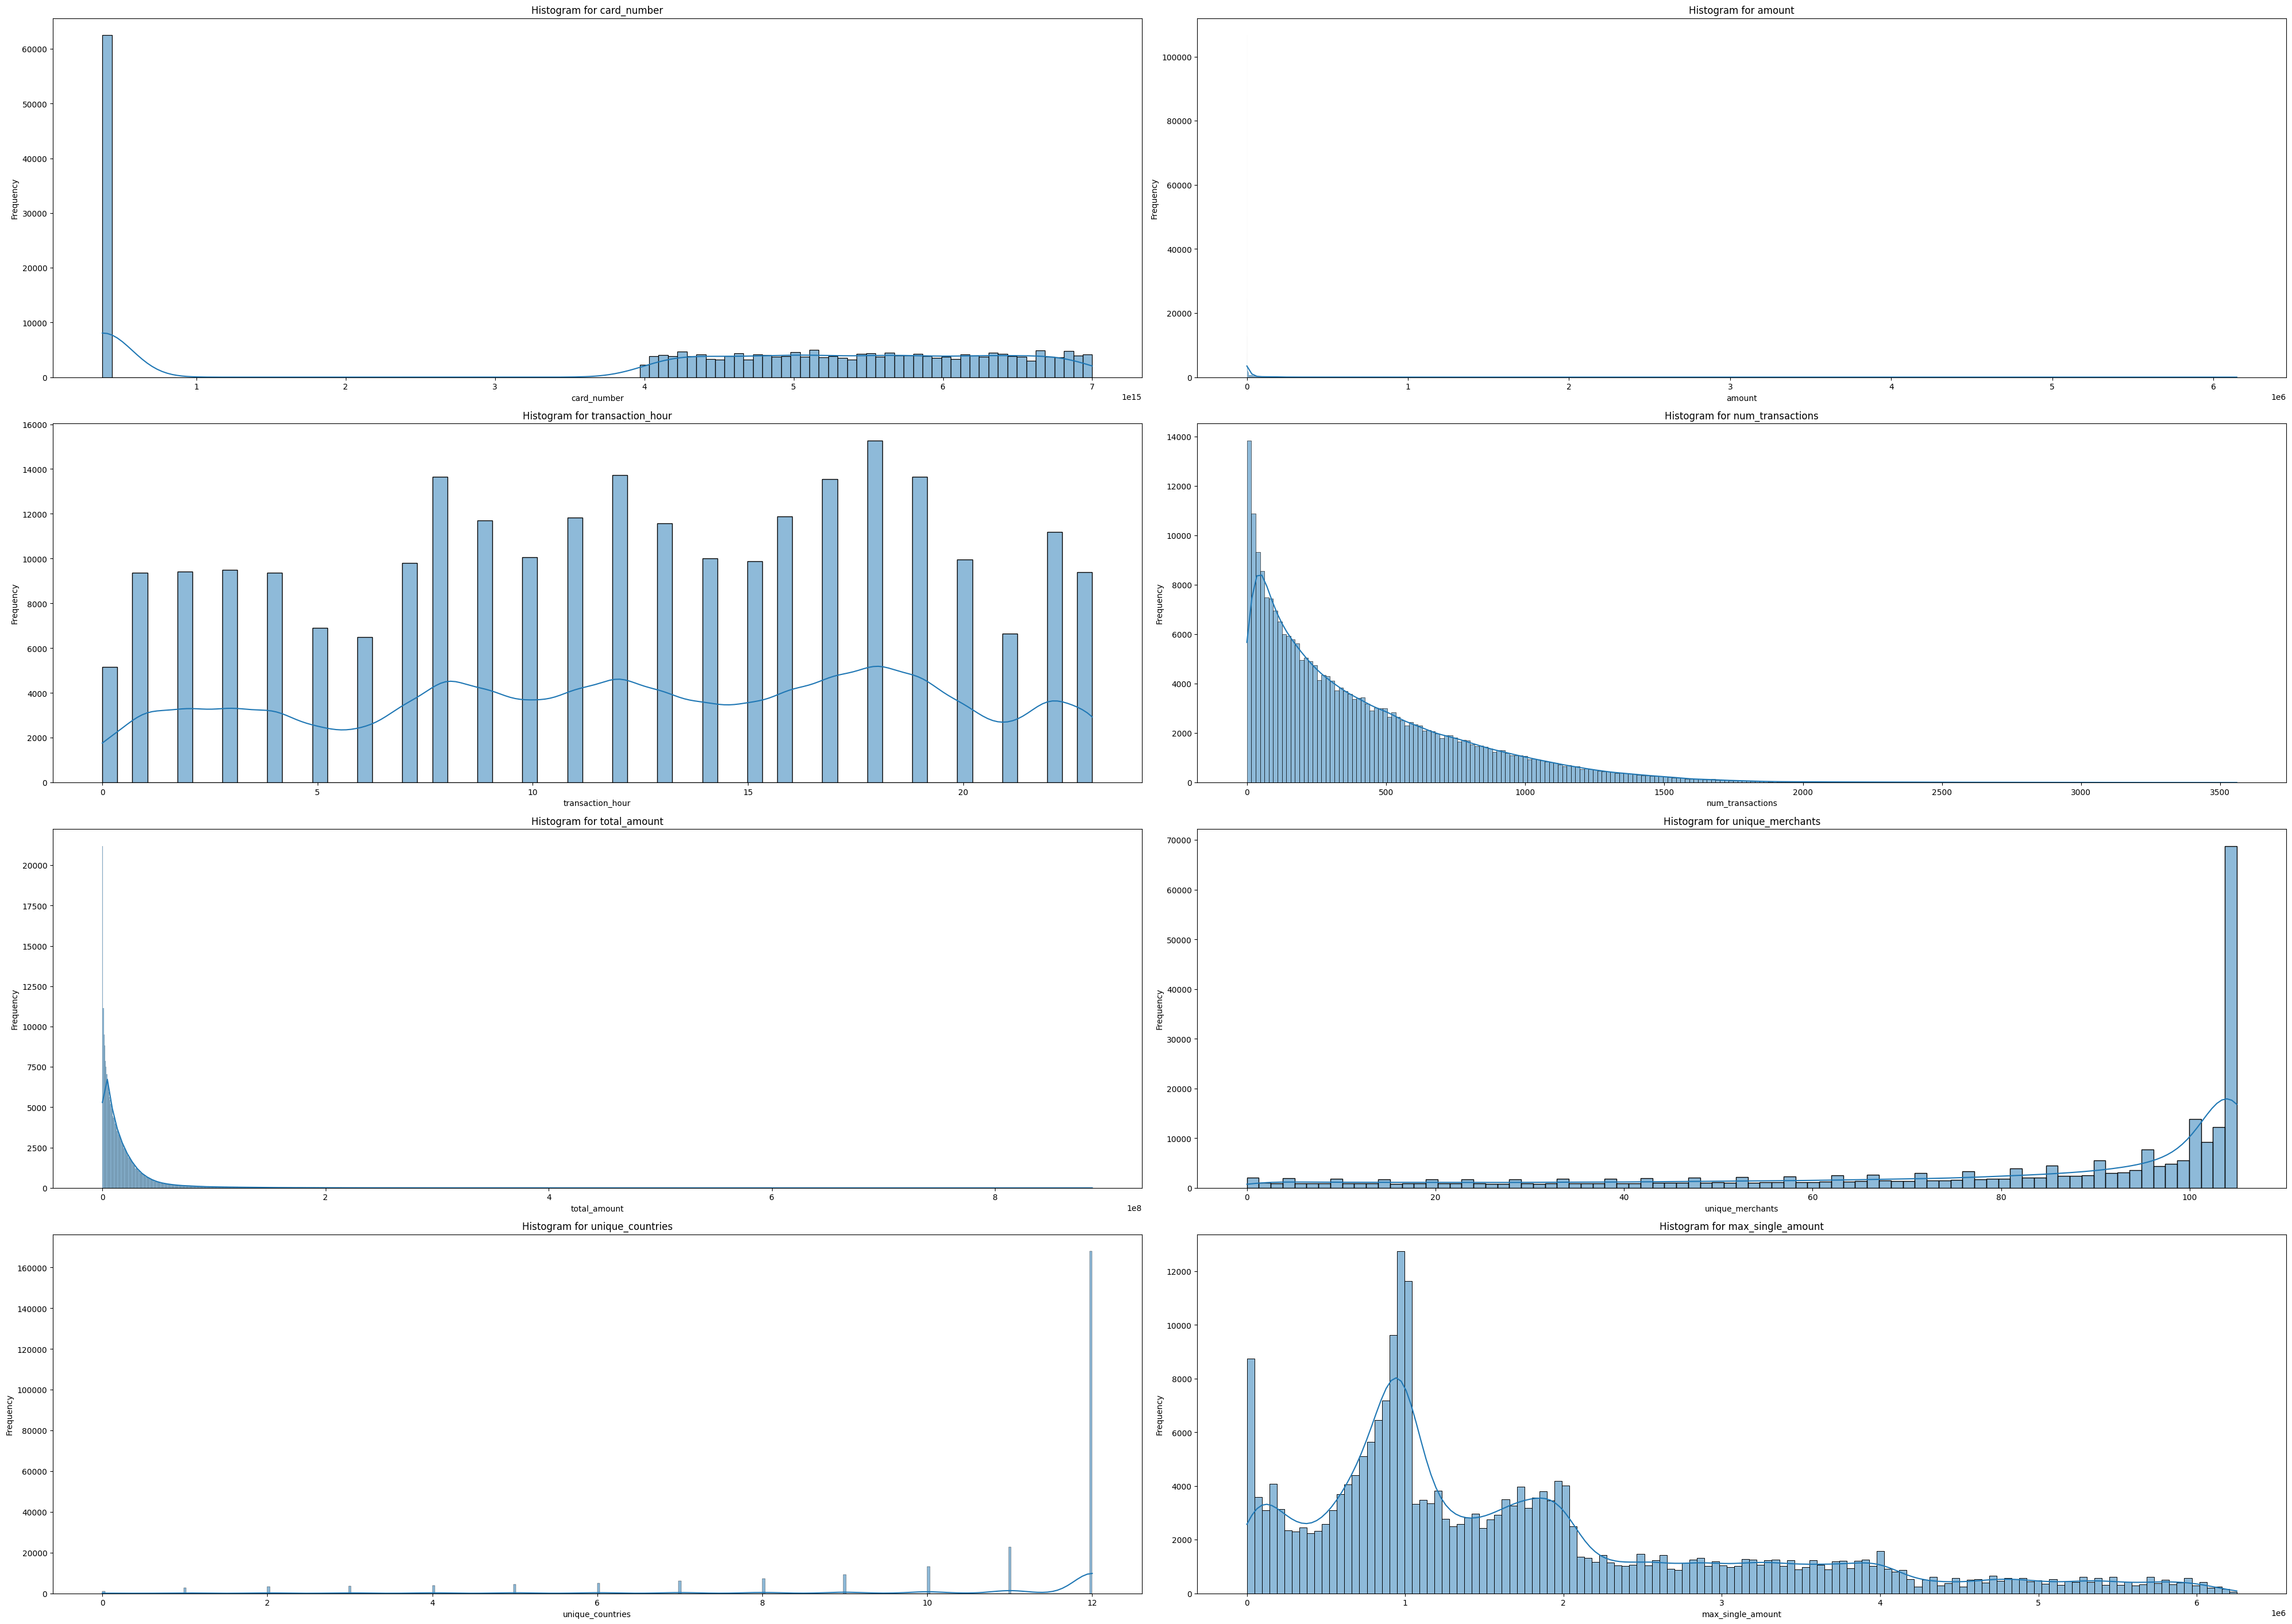

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the number of rows and columns for subplots
ncol = 2
nrow = len(numerical_cols) // ncol + 1

fig, axes = plt.subplots(nrow, ncol, figsize=(40, 35))
axes = axes.flatten()  # Flatten axes for easier indexing

for i, col in enumerate(numerical_cols):
    sns.histplot(data=transaction_sample, x=col, ax=axes[i], kde = True)
    axes[i].set_title(f'Histogram for {col}')
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


> **Transformações logarítmicas (como log1p) pode ser fundamental para melhorar a performance dos modelos — especialmente quando tens variáveis com distribuições altamente enviesadas (skewed), como é comum em problemas financeiros e de deteção de fraude.**
>
> #  Por que isto melhora o modelo?
> **Modelos como regressão linear, redes neuronais, SVM, etc., funcionam melhor quando a relação entre features e target é mais linear ou quando os dados são mais “bem comportados”.
Se tens uma feature que:
	•	Vai de 0.01 a 10.000,
	•	E 99.9% dos casos estão entre 0.01 e 100,
…então os valores extremos dominam o cálculo da loss e dos gradientes durante o treino — e o modelo não generaliza bem.**
>
> df['amount_log'] = np.log1p(df['amount'])
>
> **Se for left-skewed:**
> df['var_log'] = np.log1p(df['var'].max() - df['var'])


In [17]:
print("Skews of each variable;")

for col in numerical_cols:
    print(f"${col} -> " , transaction_sample[col].skew())

Skews of each variable;
$card_number ->  -0.8112267071772742
$amount ->  12.014933471413608
$transaction_hour ->  -0.1375103872558959
$num_transactions ->  1.552843097869525
$total_amount ->  6.53772034330384
$unique_merchants ->  -1.173390359181602
$unique_countries ->  -2.2249913763047005
$max_single_amount ->  1.1888185027189204


## Observações - Verificar a distribuição (Variáveis Númericas)

As variáveis, **num_transactions, total_amount** estão **right skewed** o que significa que os seus outliers poderão afetar a accuracy do modelo.

A variável unique_merchants, está **left skewed**, o que significa que existe poucos valores pequenos.

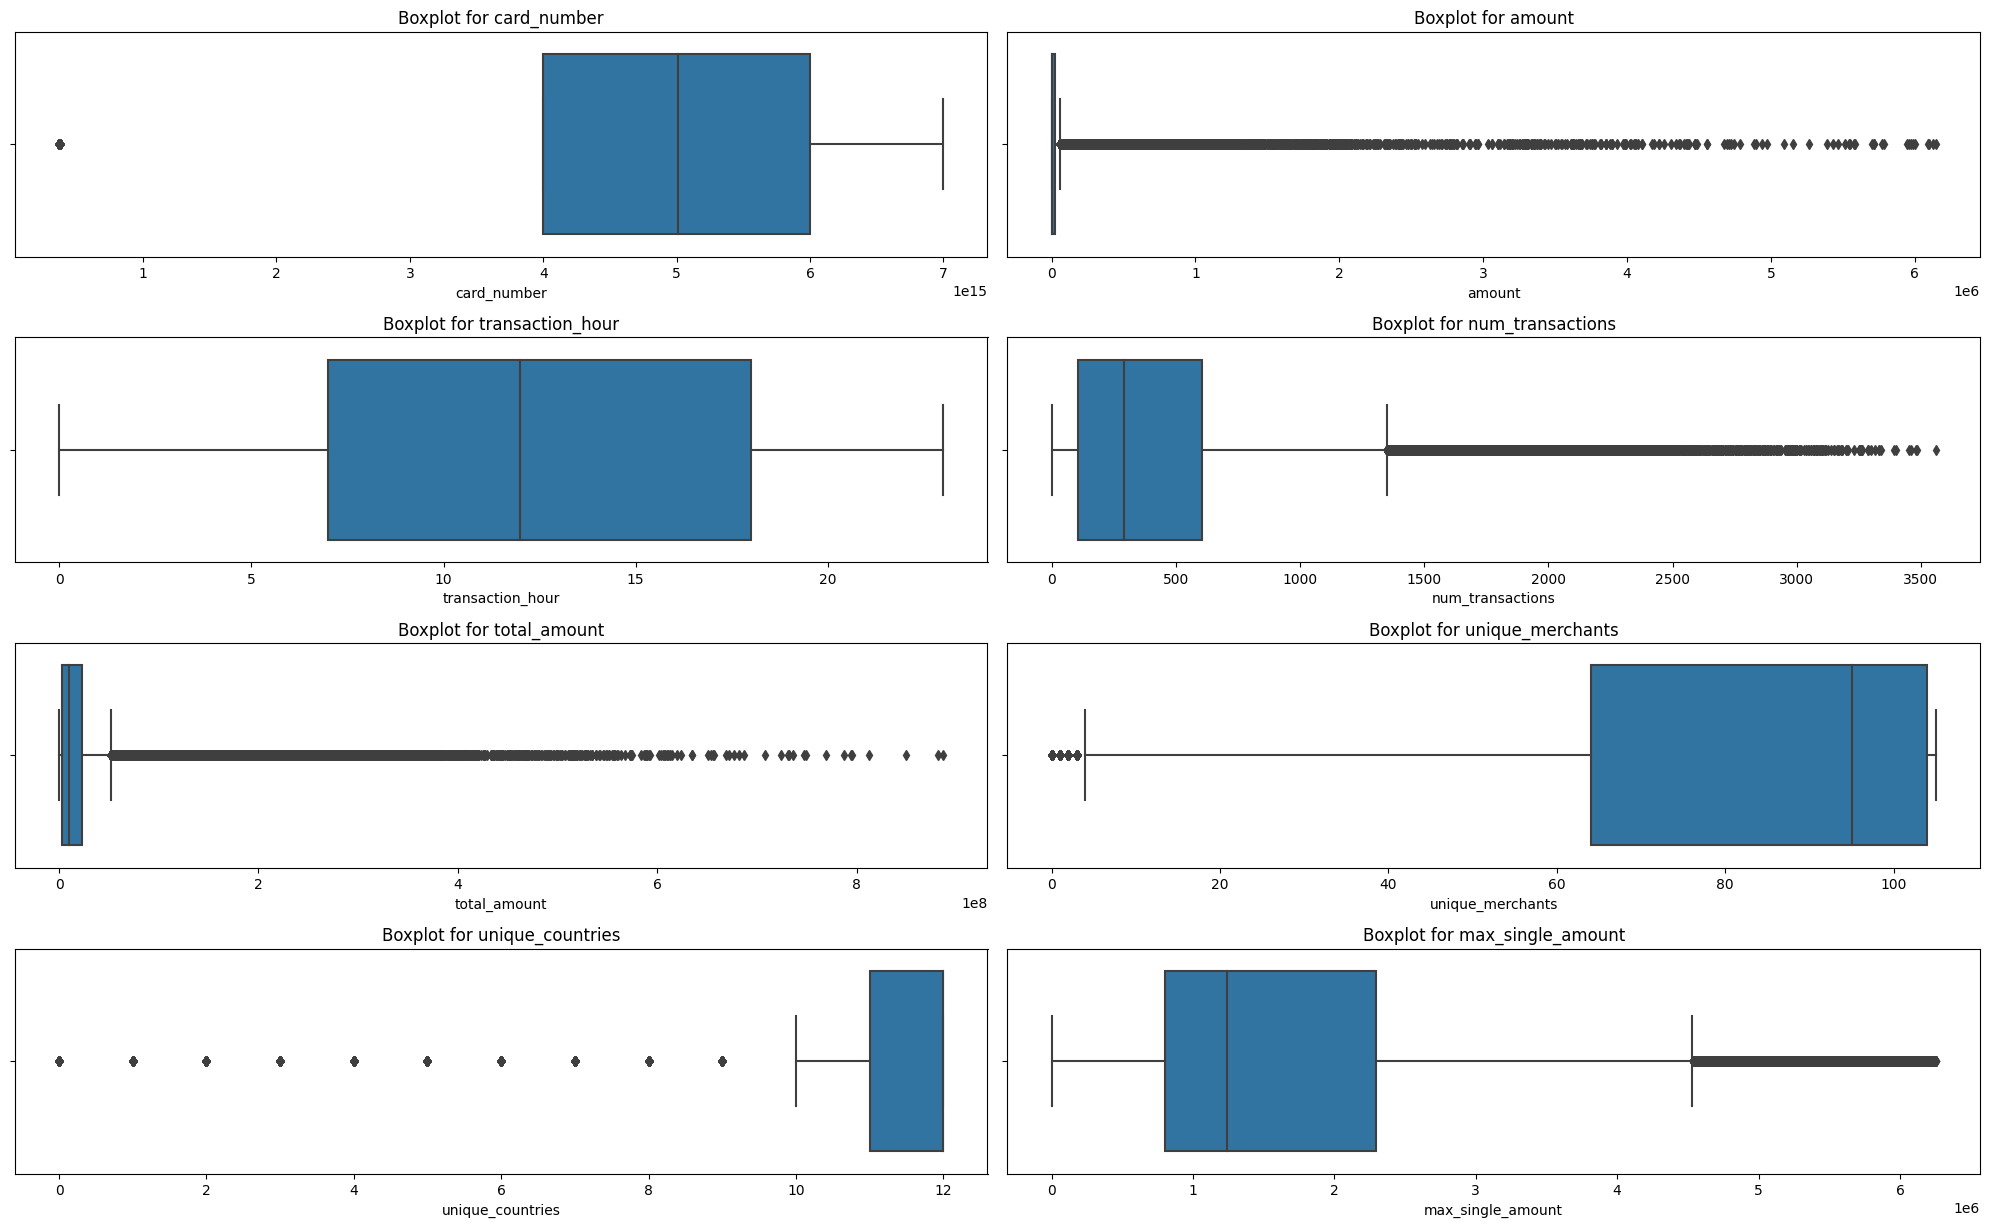

In [18]:
# Adjust the number of rows and columns for subplots
ncol = 2
nrow = len(numerical_cols) // ncol + 1

fig, axes = plt.subplots(nrow, ncol, figsize=(20, 15))
axes = axes.flatten()  # Flatten axes for easier indexing

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=transaction_sample, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')
    
# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Observações - Verificar os outliers (Variáveis Númericas)

Interpretação visual do boxplot

1. Caixa no meio (simétrica)
* A distribuição dos dados é mais ou menos normal (gaussiana).
* A mediana está centrada, sem skew.
* Bom para modelos que assumem normalidade.

⸻

2. Caixa encostada à esquerda (cauda longa à direita)
*  Right-skewed (assimetria à direita).
* A maioria dos dados são valores baixos, mas existem valores muito altos que puxam a cauda.
*  Frequente em fraudes, salários, preços, etc.

⸻

3. Caixa encostada à direita (cauda longa à esquerda)
* Left-skewed (assimetria à esquerda).
* Muitos valores altos com poucos valores muito baixos.
*  Menos comum, mas pode aparecer em tempo de resposta, por exemplo.

⸻

4. Caixa minúscula ou invisível
*  Os dados estão muito concentrados em um valor ou intervalo pequeno.
*  Pode haver pouca variabilidade real ou então o gráfico está comprimido por outliers extremos.
*  Isso esconde a mediana e o IQR — precisa de transformação (log, escala, zoom).


In [19]:
def check_outliers():
    for col in numerical_cols:
        q1 = transaction_sample[col].quantile(0.25)
        q3 = transaction_sample[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        
        outlier_count = len(transaction_sample[(transaction_sample[col] > upper) | (transaction_sample[col] < lower)])
        print(f'Outlier Count for {col} : {outlier_count}')

check_outliers()

Outlier Count for card_number : 62491
Outlier Count for amount : 38262
Outlier Count for transaction_hour : 0
Outlier Count for num_transactions : 6907
Outlier Count for total_amount : 18546
Outlier Count for unique_merchants : 4074
Outlier Count for unique_countries : 46363
Outlier Count for max_single_amount : 15286


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


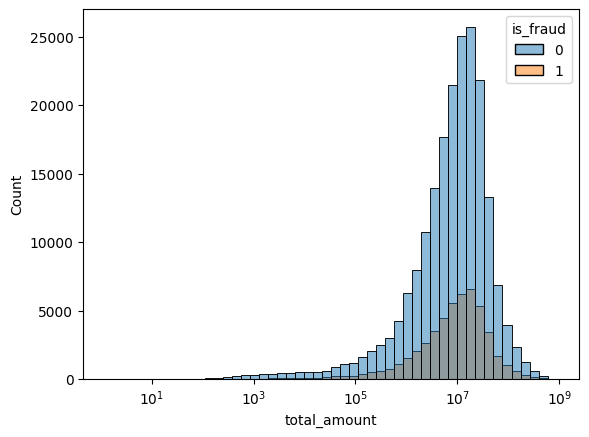

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


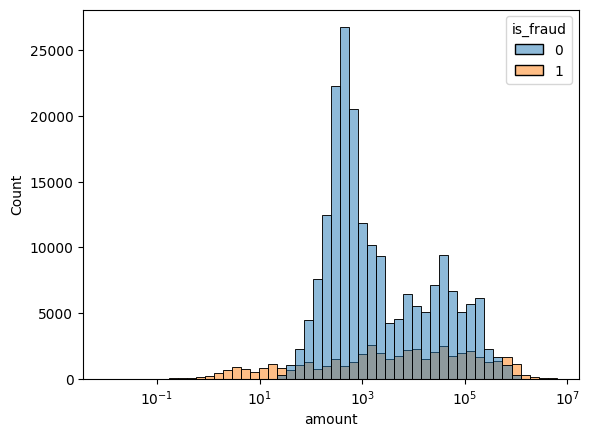

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


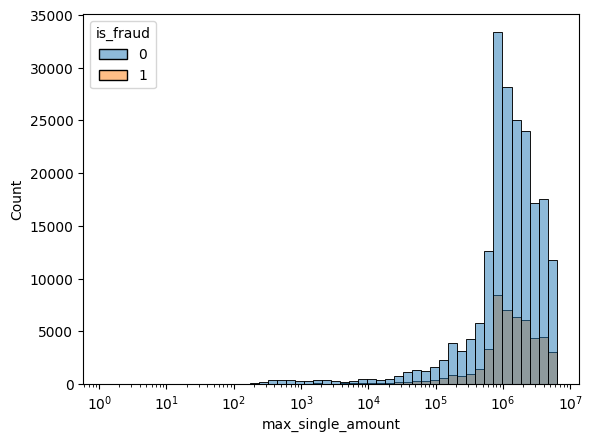

In [20]:
sns.histplot(data=transaction_sample, x=transaction_sample['total_amount'], hue='is_fraud', log_scale=True, bins=50)
plt.show()

sns.histplot(data=transaction_sample, x=transaction_sample['amount'], hue='is_fraud', log_scale=True, bins=50)
plt.show()

sns.histplot(data=transaction_sample, x=transaction_sample['max_single_amount'], hue='is_fraud', log_scale=True, bins=50)
plt.show()

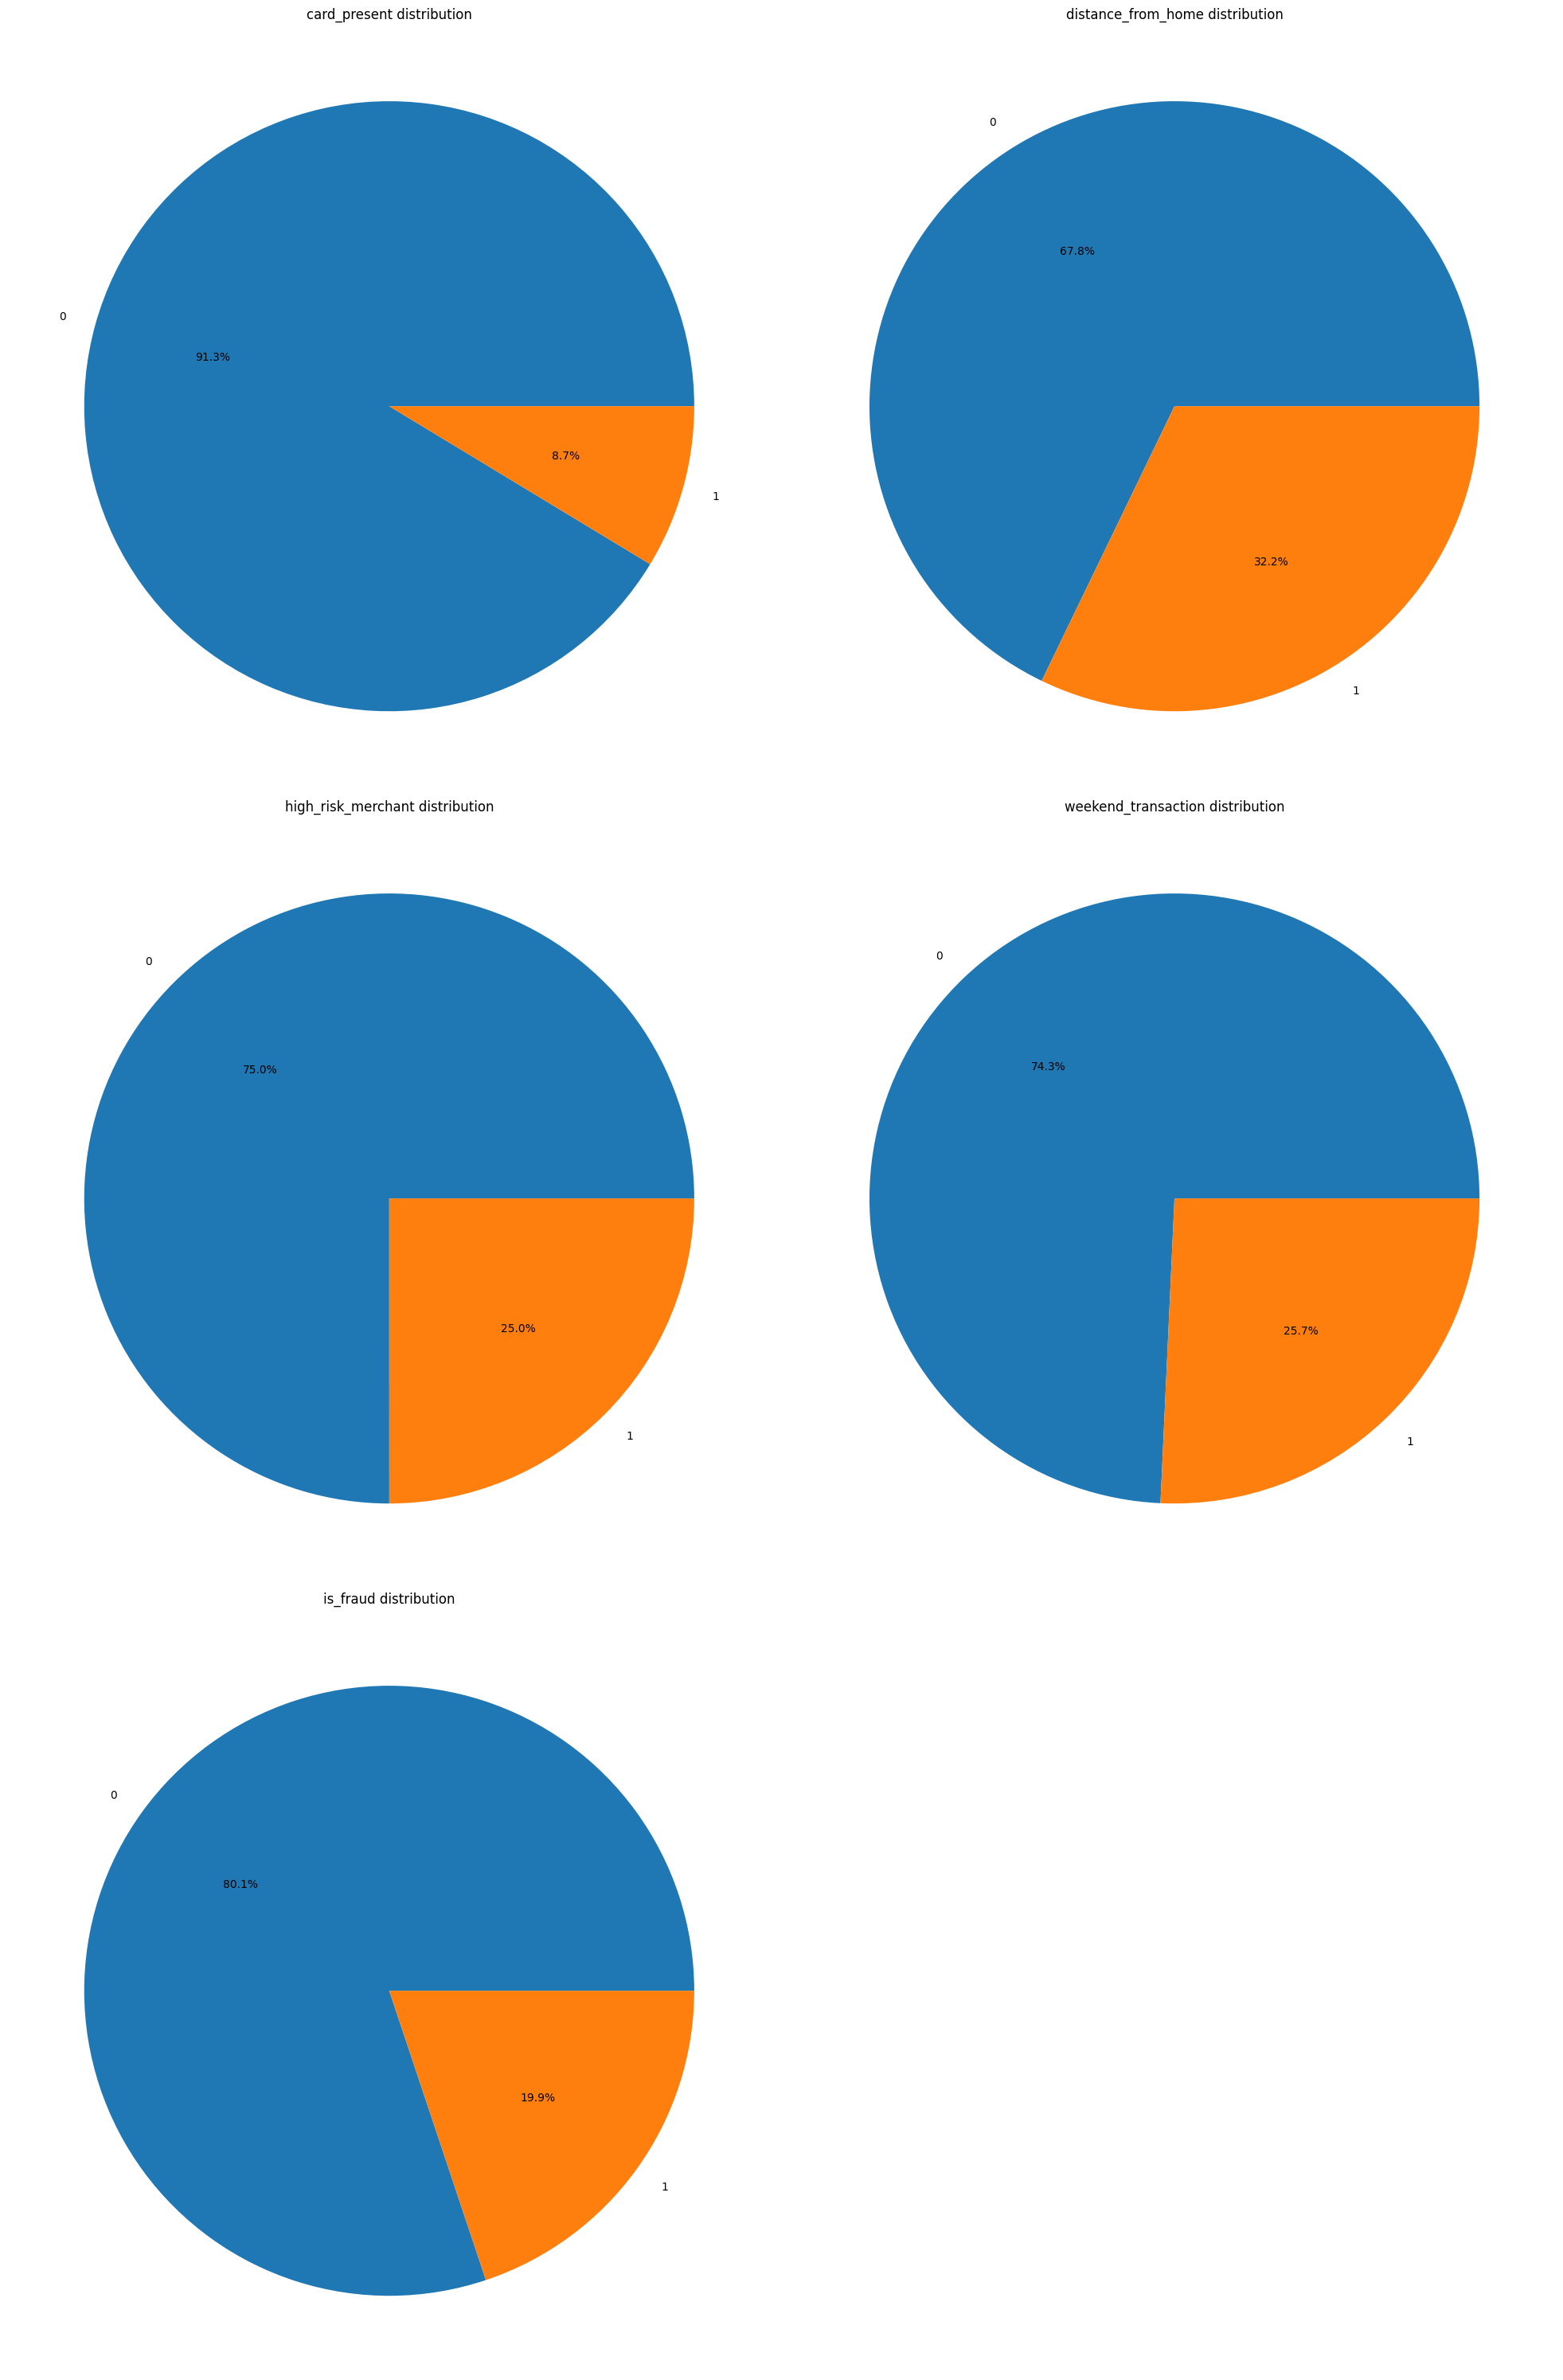

In [21]:
binary_cols = ['card_present', 'distance_from_home', 'high_risk_merchant', 'weekend_transaction', 'is_fraud']

# Adjust the number of rows and columns for subplots
ncol = 2
nrow = len(binary_cols) // ncol + 1

fig, axes = plt.subplots(nrow, ncol, figsize=(20, 30))
axes = axes.flatten()  # Flatten axes for easier indexing

for i, col in enumerate(binary_cols):
    value_counts = transaction_sample[col].value_counts(normalize=True)
    value_counts.plot.pie(ax=axes[i], autopct='%1.1f%%')  
    axes[i].set_title(f'{col} distribution')
    axes[i].set_ylabel('')  

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [22]:
## Get the name of entire categorical features
categorical_cols = list(transaction_sample.select_dtypes('object').columns)
categorical_cols.extend(['card_present', 'distance_from_home', 'high_risk_merchant', 'weekend_transaction'])
categorical_cols.remove('merchant')
categorical_cols

['transaction_id',
 'customer_id',
 'merchant_category',
 'merchant_type',
 'currency',
 'country',
 'city',
 'city_size',
 'card_type',
 'device',
 'channel',
 'device_fingerprint',
 'ip_address',
 'card_present',
 'distance_from_home',
 'high_risk_merchant',
 'weekend_transaction']

## Observações - Verificar variáveis categóricas

In [23]:
"""


# Lista das colunas categóricas
categorical_cols = [
    'merchant_category', 'merchant_type', 'currency', 'country',
    'city', 'device_fingerprint', 'card_present',
    'distance_from_home', 'weekend_transaction'
]

# Tamanho do grid
ncol = 3
nrow = len(categorical_cols) // ncol + 1

fig, axes = plt.subplots(nrow, ncol, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.histplot(
        data=transaction_sample,
        x=col,
        hue='is_fraud',
        multiple='dodge',
        shrink=0.8,
        ax=axes[i]
    )
    axes[i].set_title(f'{col} vs fraudulent transaction status')
    axes[i].tick_params(axis='x', rotation=45)

# Remove subplots não usados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

"""

"\n\n\n# Lista das colunas categóricas\ncategorical_cols = [\n    'merchant_category', 'merchant_type', 'currency', 'country',\n    'city', 'device_fingerprint', 'card_present',\n    'distance_from_home', 'weekend_transaction'\n]\n\n# Tamanho do grid\nncol = 3\nnrow = len(categorical_cols) // ncol + 1\n\nfig, axes = plt.subplots(nrow, ncol, figsize=(20, 15))\naxes = axes.flatten()\n\nfor i, col in enumerate(categorical_cols):\n    sns.histplot(\n        data=transaction_sample,\n        x=col,\n        hue='is_fraud',\n        multiple='dodge',\n        shrink=0.8,\n        ax=axes[i]\n    )\n    axes[i].set_title(f'{col} vs fraudulent transaction status')\n    axes[i].tick_params(axis='x', rotation=45)\n\n# Remove subplots não usados\nfor j in range(i + 1, len(axes)):\n    fig.delaxes(axes[j])\n\nplt.tight_layout()\nplt.show()\n\n"

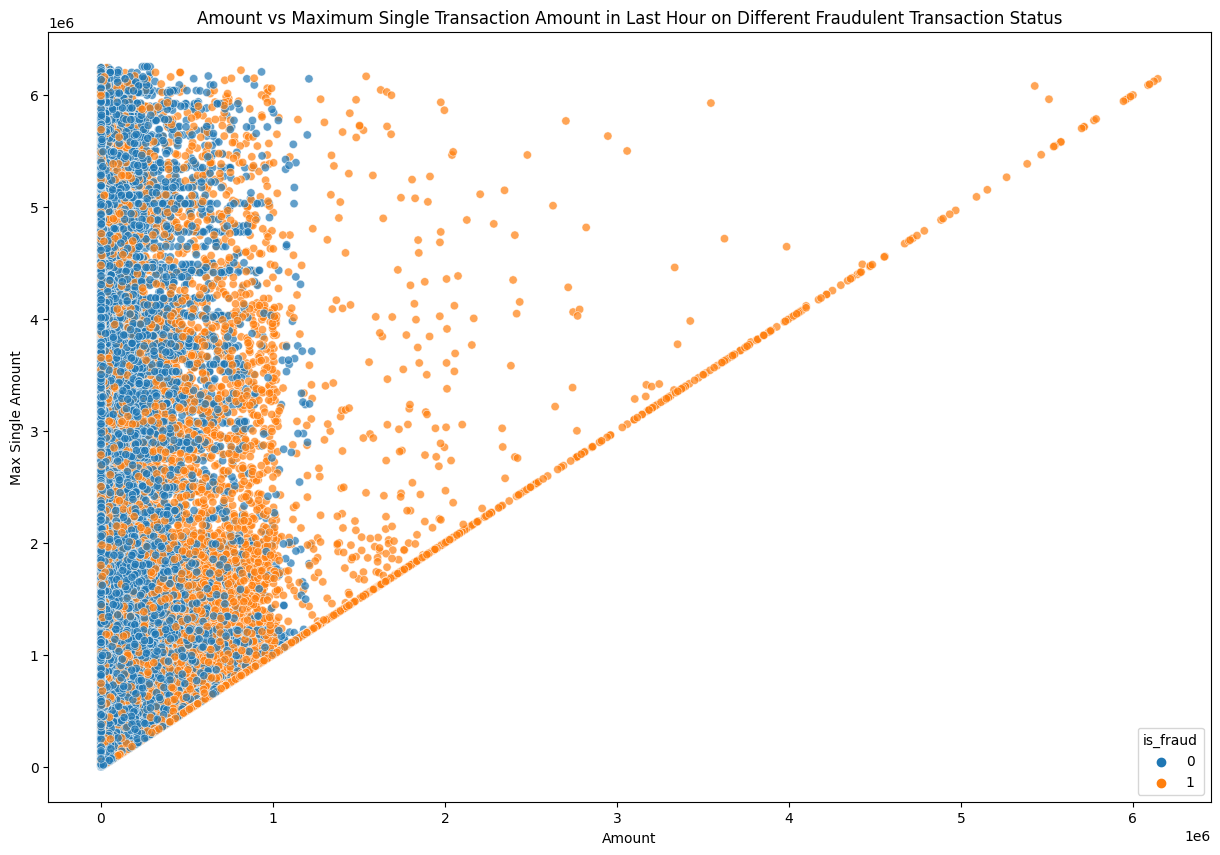

In [24]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=transaction_sample, x='amount', y='max_single_amount', hue='is_fraud', alpha=0.7)
plt.title('Amount vs Maximum Single Transaction Amount in Last Hour on Different Fraudulent Transaction Status')
plt.xlabel('Amount')
plt.ylabel('Max Single Amount')
plt.show()

Dá para verificar que quando o montante de transição é a maior transição atual, existe uma grande possibilidade da transação ser considerada fraudulenta. 



In [25]:
## Specific exploration on particular countries with higher proportion of fraudulent transactions
country_specific = transaction_sample[transaction_sample['country'].isin(['Russia', 'Nigeria', 'Mexico', 'Brazil'])]
country_vis = country_specific.groupby(['country', 'is_fraud'])['amount'].agg('median').reset_index()
country_vis

,country,is_fraud,amount
0,Brazil,0,2084.780
1,Brazil,1,3811.930
2,Mexico,0,8268.815
3,Mexico,1,14976.800
4,Nigeria,0,174883.120
5,Nigeria,1,294516.610
6,Russia,0,31081.490
7,Russia,1,56978.935


Podemos observar como previamente dito que quanto maior as transições mais existe a possibildiade de haver fraude, dai a mediana de valores ser mais alta nos casos de fraude. Além disso, podemos verificar que a Nigéria tem uma quantidade de transações altas muito superior ao outros paises

**O que devemos fazer a seguir, é pegar na mediana dos diversos paises e verificar os montantes maior que a mediana**

number of abnormal transactions at Nigeria : 9020


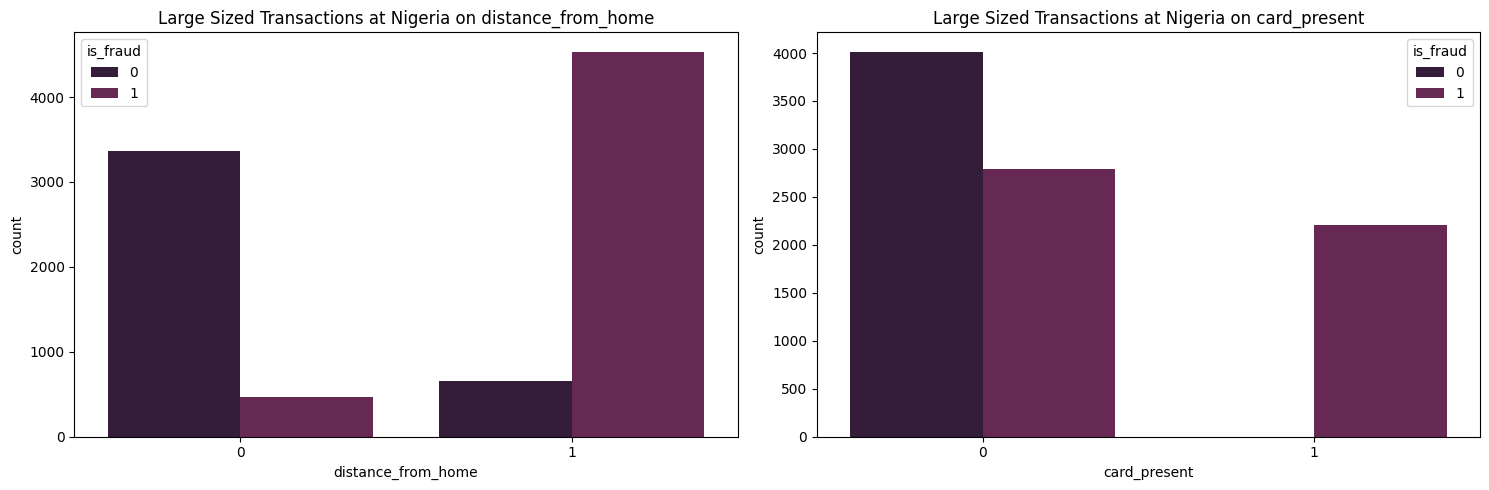

In [26]:
## Separate all transactions happened at Nigeria which its amount was abnormally high
nigeria_high_amount = transaction_sample[(transaction_sample['country'] == 'Nigeria') & (transaction_sample['amount'] > 294516)]
print(f'number of abnormal transactions at Nigeria : {nigeria_high_amount.shape[0]}')

cols = ['distance_from_home', 'card_present']

## Visualisation
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

for i, col in enumerate(cols):
    tmp_data = nigeria_high_amount[[col, 'is_fraud']].value_counts().reset_index()
    sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud', palette = sns.color_palette('rocket'), ax = axes[i])
    axes[i].set_title(f'Large Sized Transactions at Nigeria on {col}')

plt.tight_layout()
plt.show()

O que podemos observar, é que as transições fraudulentas são transições feitas por pessoas de fora do pais, que vem para o pais, neste caso Nigéria e realizam a transação de forma online.

Este tipo de comportamento pode ser observado para todos os paises que contém um alto nivel de fraude.

In [27]:
high_risk_country = ['Brazil', 'Mexico', 'Nigeria', 'Russia']

In [28]:
## Exploring median amount of transaction for different devices and different transaction status
tr_amount_device = transaction_sample.groupby(['device', 'is_fraud'])[['amount']].agg('median').reset_index()
tr_amount_device

,device,is_fraud,amount
0,Android App,0,854.830
1,Android App,1,5821.765
2,Chip Reader,1,5649.475
3,Chrome,0,973.010
4,Chrome,1,6116.260
5,Edge,0,858.820
6,Edge,1,4868.610
7,Firefox,0,884.125
8,Firefox,1,6264.610
9,Magnetic Stripe,1,5780.050


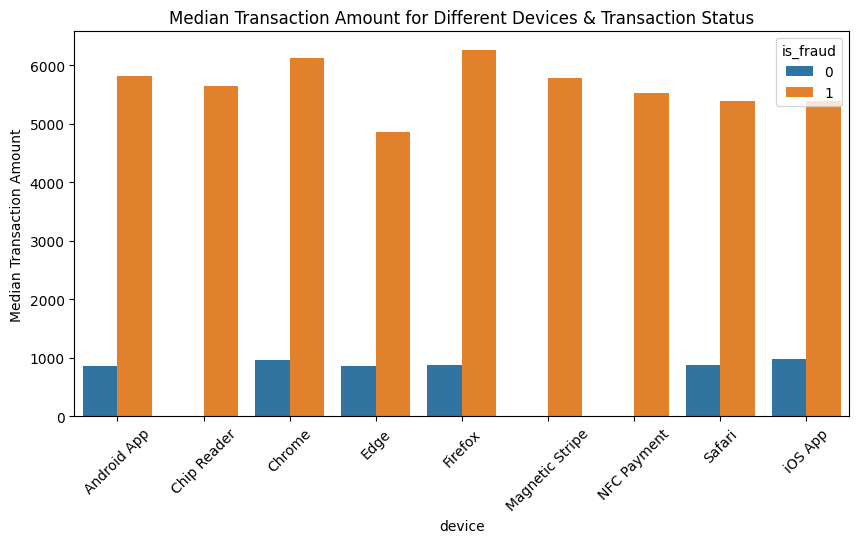

In [29]:
## Visualisation
plt.figure(figsize = (10, 5))
sns.barplot(data = tr_amount_device, x = 'device', y = 'amount', hue = 'is_fraud')
plt.title('Median Transaction Amount for Different Devices & Transaction Status')
plt.ylabel('Median Transaction Amount')
plt.xticks(rotation = 45)
plt.show()

Como dito anteriormente, não existe transações consideradas normais quando a mesma é realizada por NFC, Magnetic, Chip Reader.

In [30]:
high_risk_payment_type = ['Magnetic Stripe', 'NFC Payment', 'Chip Reader']

## Find out median transaction amount on different transaction hours
hour_med_amount = transaction_sample.groupby(['transaction_hour', 'is_fraud'])[['amount']].agg('median').reset_index()
hour_med_amount

,transaction_hour,is_fraud,amount
0,0,0,953.090
1,0,1,4682.370
2,1,0,921.355
3,1,1,6022.055
4,2,0,829.490
5,2,1,5712.715
6,3,0,913.260
7,3,1,5304.825
8,4,0,904.595
9,4,1,6273.145


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

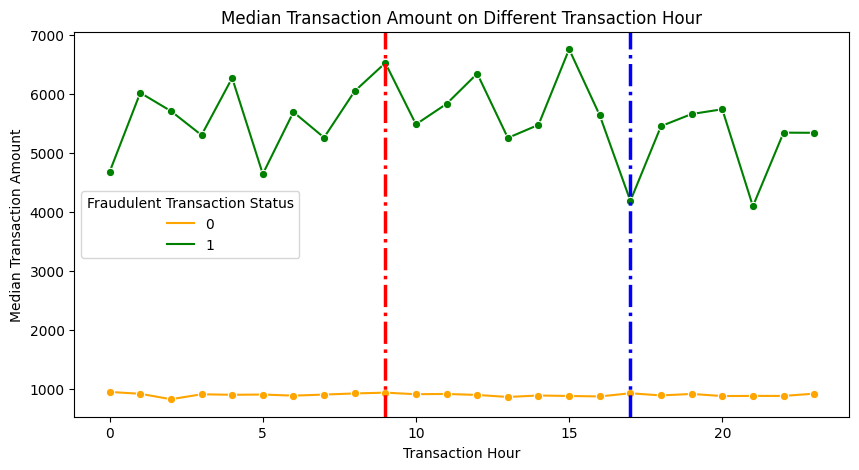

In [31]:
## Visualisation
plt.figure(figsize = (10, 5))
sns.lineplot(data = hour_med_amount, x = 'transaction_hour', y = 'amount', hue = 'is_fraud', linestyle = '-', marker = 'o',
            palette = ['orange', 'green'])
plt.axvline(x = 9, color = 'r', linestyle = '-.', linewidth = 2.5) ## Bank Opening Time
plt.axvline(x = 17, color = 'b', linestyle = '-.', linewidth = 2.5) ## Bank Closing Time
plt.legend(title = 'Fraudulent Transaction Status')
plt.title('Median Transaction Amount on Different Transaction Hour')
plt.xlabel('Transaction Hour')
plt.ylabel('Median Transaction Amount')
plt.show()

In [32]:
## Find out median transaction frequency on different transaction hours
hour_med_frequency = transaction_sample.groupby(['transaction_hour', 'is_fraud'])[['num_transactions']].agg('median').reset_index()
hour_med_frequency

,transaction_hour,is_fraud,num_transactions
0,0,0,302.0
1,0,1,288.0
2,1,0,316.0
3,1,1,293.0
4,2,0,309.0
5,2,1,313.0
6,3,0,308.0
7,3,1,318.0
8,4,0,299.0
9,4,1,312.0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

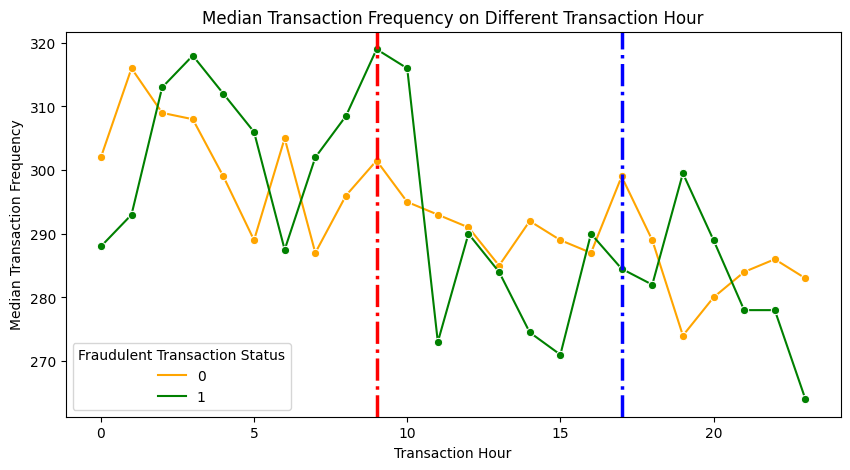

In [33]:
## Visualisation
plt.figure(figsize = (10, 5))
sns.lineplot(data = hour_med_frequency, x = 'transaction_hour', y = 'num_transactions', hue = 'is_fraud', linestyle = '-', marker = 'o',
            palette = ['orange', 'green'])
plt.axvline(x = 9, color = 'r', linestyle = '-.', linewidth = 2.5) ## Bank Opening Time
plt.axvline(x = 17, color = 'b', linestyle = '-.', linewidth = 2.5) ## Bank Closing Time
plt.legend(title = 'Fraudulent Transaction Status')
plt.title('Median Transaction Frequency on Different Transaction Hour')
plt.xlabel('Transaction Hour')
plt.ylabel('Median Transaction Frequency')
plt.show()

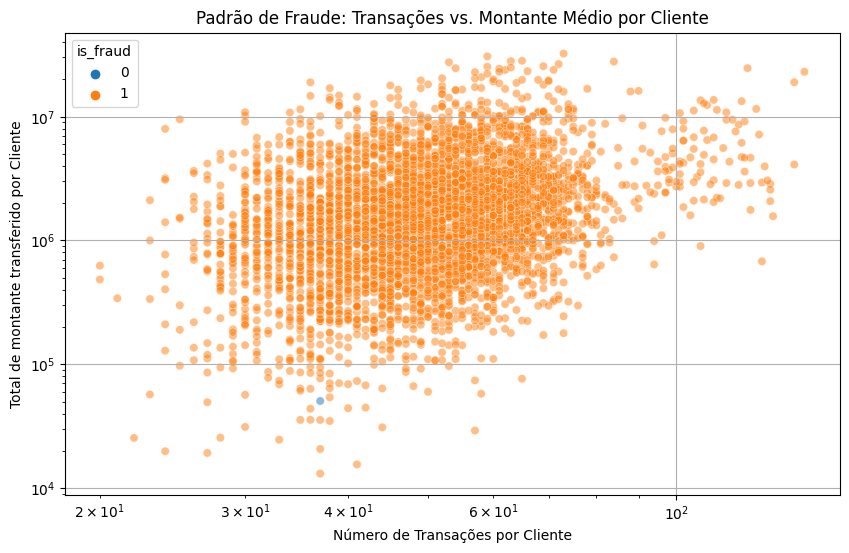

In [34]:
# Agrupar apenas uma vez por cliente
tx_summary = transaction_sample.groupby('customer_id').agg({
    'amount': ['count', 'sum', 'mean'],
    'is_fraud': 'max'  # se alguma for fraude, consideramos fraude
}).reset_index()

# Renomear colunas
tx_summary.columns = ['customer_id', 'num_transactions', 'total_amount', 'avg_amount', 'is_fraud']

# Gráfico
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=tx_summary,
    x='num_transactions',
    y='total_amount',
    hue='is_fraud',
    alpha=0.5
)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Número de Transações por Cliente")
plt.ylabel("Total de montante transferido por Cliente")
plt.title("Padrão de Fraude: Transações vs. Montante Médio por Cliente")
plt.grid(True)
plt.show()

# Feature Engineering


In [35]:
transaction_sample.head()

,transaction_id,customer_id,card_number,merchant_category,merchant_type,merchant,amount,currency,country,city,city_size,card_type,card_present,device,channel,device_fingerprint,ip_address,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,is_fraud,year,month,day,hour,day_of_week,num_transactions,total_amount,unique_merchants,unique_countries,max_single_amount
0,TX_b5b17800,CUST_46478,5699657752967952,Entertainment,streaming,Spotify,169.37,EUR,Germany,Unknown City,medium,Premium Debit,0,Firefox,web,ce7db67743bf5fffdfa5b2ecfb4e6de0,140.170.128.51,0,1,17,0,0,2024,10,7,17,0,27,2.527161e+06,21,6,1.897486e+06
1,TX_9c391f0e,CUST_49102,371384150413036,Restaurant,premium,Ruth's Chris,823.67,CAD,Canada,Unknown City,medium,Platinum Credit,0,Chrome,web,d654a7f29023652d55a4574b8fc6ea4a,45.93.44.23,0,0,14,0,0,2024,10,16,14,2,437,1.567628e+07,102,12,1.491427e+06
2,TX_c006b556,CUST_60071,379239643871947,Entertainment,streaming,Spotify,21948.66,RUB,Russia,Unknown City,medium,Gold Credit,0,Safari,web,6d945d3387a7d9eb150ec7d30bd3d621,52.255.14.155,0,1,16,0,0,2024,10,30,16,2,6,3.404636e+05,6,5,2.592671e+05
3,TX_1ec4e8e0,CUST_85188,6915403402912841,Healthcare,medical,Lab Corp,1602.46,NGN,Nigeria,Unknown City,medium,Premium Debit,0,Edge,web,4af6ed569634c7b9311dc6968b50e29e,65.194.56.96,1,0,8,0,1,2024,10,3,8,3,944,2.583898e+07,105,12,1.871011e+06
4,TX_6b0f6cba,CUST_12828,376941479073646,Restaurant,casual,Applebee's,89.80,SGD,Singapore,Unknown City,medium,Basic Debit,0,Firefox,web,fcaf3544fe07e389572c90dc02921857,193.111.77.221,0,0,22,0,0,2024,10,8,22,1,148,2.367273e+06,71,11,6.834904e+05


In [36]:
def convert_currency_amt(transaction_sample):
    # Define the conversion rates for each currency
    conversion_rates = {
        'EUR': 1.06,
        'CAD': 0.72,
        'RUB': 0.01,
        'NGN': 0.0006,
        'SGD': 0.75,
        'MXN': 0.049,
        'BRL': 0.17,
        'AUD': 0.65,
        'JPY': 0.0065
    }
    
    # Add a column by mapping the currency to the corresponding conversion rate,
    # defaulting to 1.28 for Great Britain Pound if currency is not in the dictionary
    transaction_sample['USD_converted_amount'] = transaction_sample['amount'] * \
                                                 transaction_sample['currency'].map(conversion_rates).fillna(1.28)

    transaction_sample['USD_converted_total_amount'] = transaction_sample['total_amount'] * \
                                                 transaction_sample['currency'].map(conversion_rates).fillna(1.28)

    transaction_sample['max_single_amount'] = transaction_sample['max_single_amount'] * \
                                                 transaction_sample['currency'].map(conversion_rates).fillna(1.28)
    
    
    transaction_sample.drop(['amount', 'currency'], axis = 1, inplace = True)
    return transaction_sample

# Run the function
transaction_sample = convert_currency_amt(transaction_sample)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


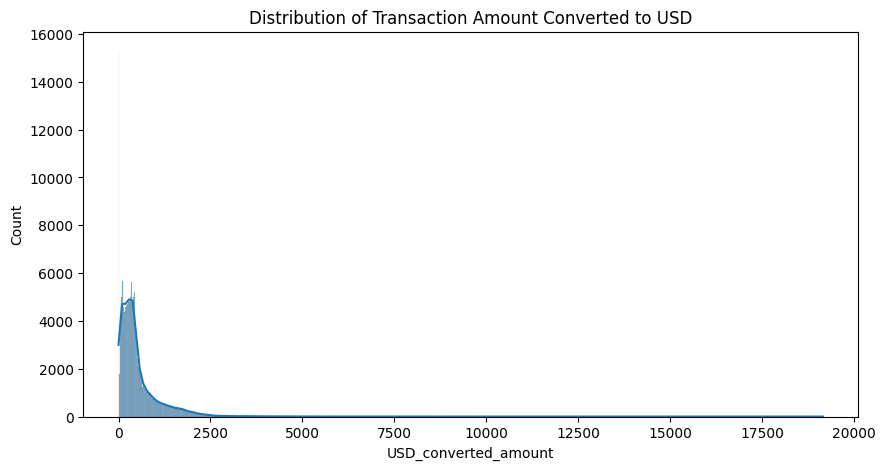

In [37]:
plt.figure(figsize = (10, 5))
sns.histplot(data = transaction_sample, x = 'USD_converted_amount', kde = True)
plt.title('Distribution of Transaction Amount Converted to USD')
plt.show()

In [38]:
transaction_sample['is_off_hours'] = transaction_sample['transaction_hour'].between(9, 17).astype(int)

In [39]:
transaction_sample['USD_converted_amount'].describe()

count    250000.000000
mean        537.578000
std         714.944939
min           0.002424
25%         167.158275
50%         353.857950
75%         621.011600
max       19154.073600
Name: USD_converted_amount, dtype: float64

In [40]:
## Ordinal Categorical Variable
transaction_sample['card_type'] = transaction_sample['card_type'].map({
    'Premium Debit' : 4, 
    'Platinum Credit' : 3,
    'Gold Credit' : 2,
    'Basic Debit' : 1,
    'Basic Credit' : 0
})

"""
Isto é realizado desta forma para capturarmos a semantica da
importancia do tipo de pagamento
"""

'\nIsto é realizado desta forma para capturarmos a semantica da\nimportancia do tipo de pagamento\n'

In [41]:
transaction_sample['is_high_amount'] = (transaction_sample['USD_converted_amount'] > 1000).astype(int)
transaction_sample['is_low_amount'] = (transaction_sample['USD_converted_amount'] < 100).astype(int)

In [42]:
## Criar uma variável para associar o tipo de pagamento com os paises

"""
high_risk_country
high_risk_payment_type
"""

transaction_sample['high_risk_transaction'] = (
    transaction_sample['country'].isin(high_risk_country) & 
    transaction_sample['device'].isin(high_risk_payment_type)
).astype(int)

transaction_sample["suspicious_device"] = transaction_sample["device"].isin(["NFC Payment", "Magnetic Stripe", "Chip Reader"]).astype(int)

In [43]:
# Identify top merchants based on frequency or other criteria
top_merchants = transaction_sample['merchant'].value_counts().nlargest(20).index

# Replace merchants not in top_merchants with "Other"
transaction_sample['merchant'] = transaction_sample['merchant'].apply(lambda x: x if x in top_merchants else 'Other')

# One-hot encode
transaction_sample = pd.get_dummies(transaction_sample, columns=['merchant'], prefix='merchant', dtype = 'int')

In [44]:
transaction_sample = pd.get_dummies(transaction_sample, columns=['merchant_type'], prefix='merchant_type', dtype = 'int')
transaction_sample = pd.get_dummies(transaction_sample, columns=['merchant_category'], prefix='merchant_category', dtype = 'int')
transaction_sample = pd.get_dummies(transaction_sample, columns=['country'], prefix='country', dtype = 'int')
transaction_sample = pd.get_dummies(transaction_sample, columns=['city'], prefix='city', dtype = 'int')
transaction_sample = pd.get_dummies(transaction_sample, columns=['device'], prefix='device', dtype = 'int')
transaction_sample = pd.get_dummies(transaction_sample, columns=['channel'], prefix='channel', dtype = 'int')
transaction_sample = pd.get_dummies(transaction_sample, columns=['city_size'], prefix='channel', dtype = 'int')

In [45]:
transaction_sample['micro_transaction_risk'] = (
    (transaction_sample['num_transactions'] > 20) &
    (transaction_sample['total_amount'] < 100)
).astype(int)

In [46]:
transaction_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Columns: 113 entries, transaction_id to micro_transaction_risk
dtypes: float64(4), int32(5), int64(100), object(4)
memory usage: 210.8+ MB


In [47]:
## Drop PII that might be unncessary in performing further regression task
transaction_sample.drop(['transaction_id', 'customer_id', 'card_number', 'ip_address', 'device_fingerprint'], axis = 1, inplace = True)

In [48]:
transaction_cleaned = transaction_sample.copy()
transaction_cleaned.head()

,card_type,card_present,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,is_fraud,year,month,day,hour,day_of_week,num_transactions,total_amount,unique_merchants,unique_countries,max_single_amount,USD_converted_amount,USD_converted_total_amount,is_off_hours,is_high_amount,is_low_amount,high_risk_transaction,suspicious_device,merchant_Amazon Fresh,merchant_Barnes & Noble,merchant_CVS Pharmacy,merchant_Chegg,merchant_DuaneReade,merchant_FreshDirect,merchant_Highway Gas Stop,merchant_Instacart,merchant_Lab Corp,merchant_Local Gas Station,merchant_Local Hospital,merchant_MasterClass,merchant_Medical Center,merchant_Other,merchant_Rite Aid,merchant_Truck Stop,merchant_University Bookstore,merchant_Urgent Care,merchant_Walgreens,merchant_Walmart Grocery,merchant_edX,merchant_type_airlines,merchant_type_booking,merchant_type_casual,merchant_type_events,merchant_type_fast_food,merchant_type_gaming,merchant_type_hotels,merchant_type_local,merchant_type_major,merchant_type_medical,merchant_type_online,merchant_type_pharmacy,merchant_type_physical,merchant_type_premium,merchant_type_streaming,merchant_type_supplies,merchant_type_transport,merchant_category_Education,merchant_category_Entertainment,merchant_category_Gas,merchant_category_Grocery,merchant_category_Healthcare,merchant_category_Restaurant,merchant_category_Retail,merchant_category_Travel,country_Australia,country_Brazil,country_Canada,country_France,country_Germany,country_Japan,country_Mexico,country_Nigeria,country_Russia,country_Singapore,country_UK,country_USA,city_Chicago,city_Dallas,city_Houston,city_Los Angeles,city_New York,city_Philadelphia,city_Phoenix,city_San Antonio,city_San Diego,city_San Jose,city_Unknown City,device_Android App,device_Chip Reader,device_Chrome,device_Edge,device_Firefox,device_Magnetic Stripe,device_NFC Payment,device_Safari,device_iOS App,channel_mobile,channel_pos,channel_web,channel_large,channel_medium,micro_transaction_risk
0,4,0,0,1,17,0,0,2024,10,7,17,0,27,2.527161e+06,21,6,2.011335e+06,179.532200,2.678791e+06,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,3,0,0,0,14,0,0,2024,10,16,14,2,437,1.567628e+07,102,12,1.073827e+06,593.042400,1.128692e+07,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
2,2,0,0,1,16,0,0,2024,10,30,16,2,6,3.404636e+05,6,5,2.592671e+03,219.486600,3.404636e+03,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
3,4,0,1,0,8,0,1,2024,10,3,8,3,944,2.583898e+07,105,12,1.122606e+03,0.961476,1.550339e+04,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
4,1,0,0,0,22,0,0,2024,10,8,22,1,148,2.367273e+06,71,11,5.126178e+05,67.350000,1.775455e+06,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0


De seguida verificamos as variáveis com maior nível de similiridade, fazemos isto para que não haja redundancia, de modo a não interferir com a performance do modelo.

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


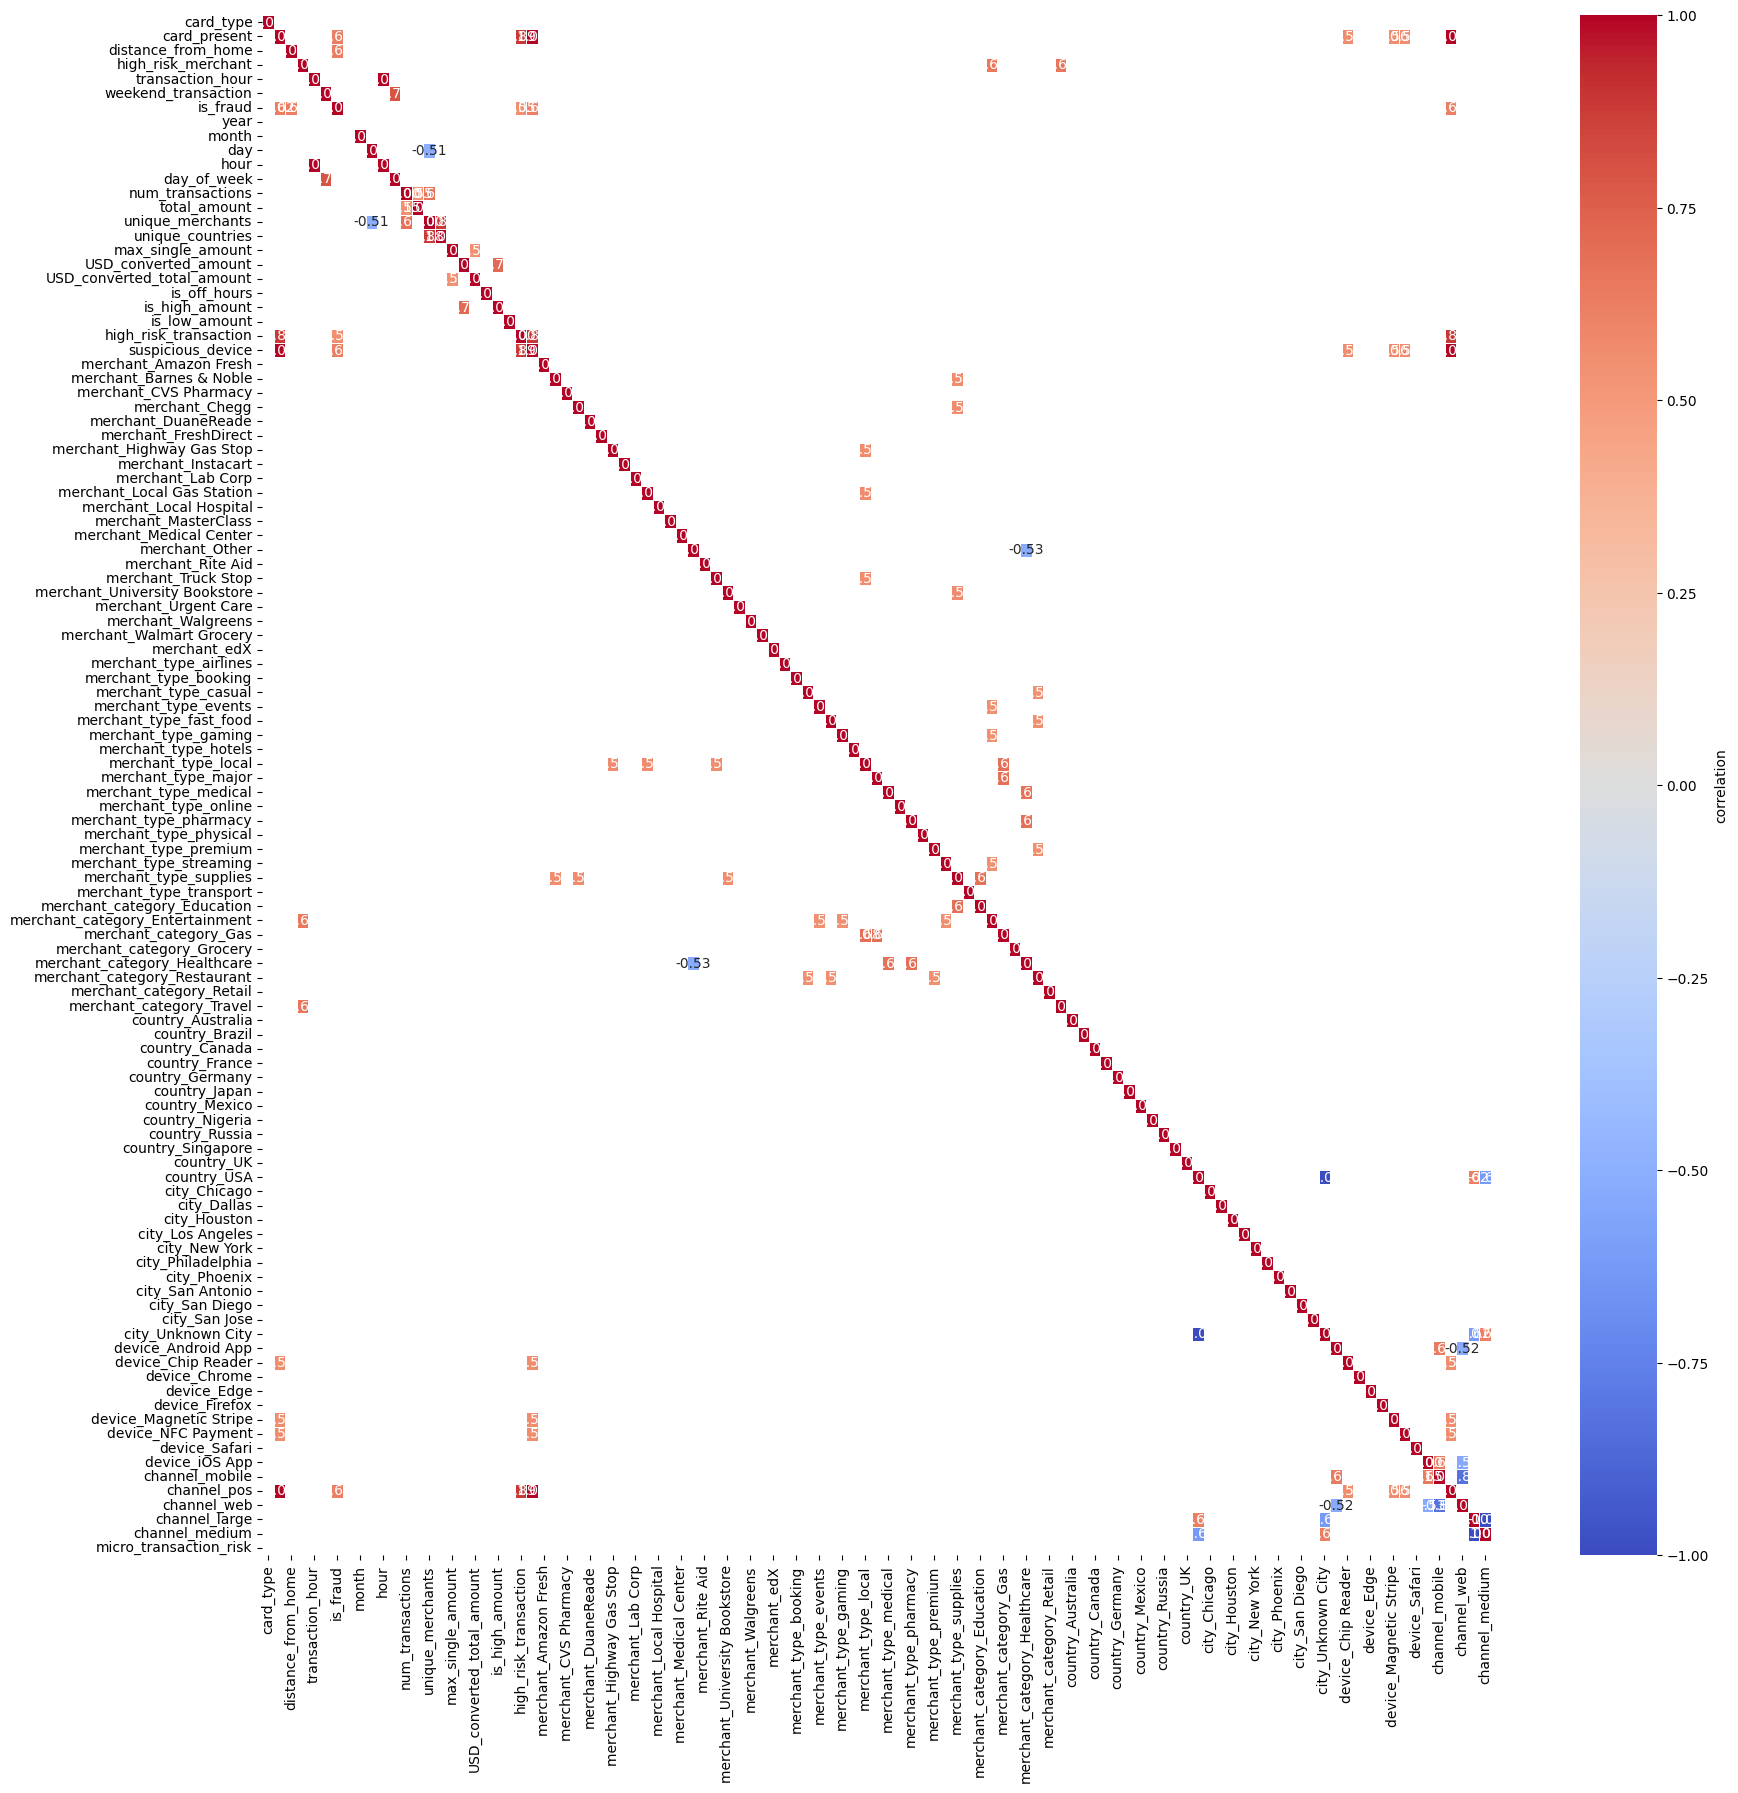

In [49]:
## Heatmap Creation to perform multivariate analysis
transaction_corr = transaction_cleaned.corr()

# Set up a threshold to limit uncorrelated values to be visible
threshold = 0.5

# Filter the possible correlations
filtered_corr = transaction_corr[abs(transaction_corr) >= 0.5]

# Visualisation
plt.figure(figsize = (20, 20))
sns.heatmap(filtered_corr, vmin = -1, vmax = 1, annot = True, fmt = '.2f', linewidth = 0.5, mask = filtered_corr.isnull(), 
           cmap = 'coolwarm', cbar_kws = {'label' : 'correlation'})
plt.show()

# Training

In [50]:
from sklearn.model_selection import train_test_split

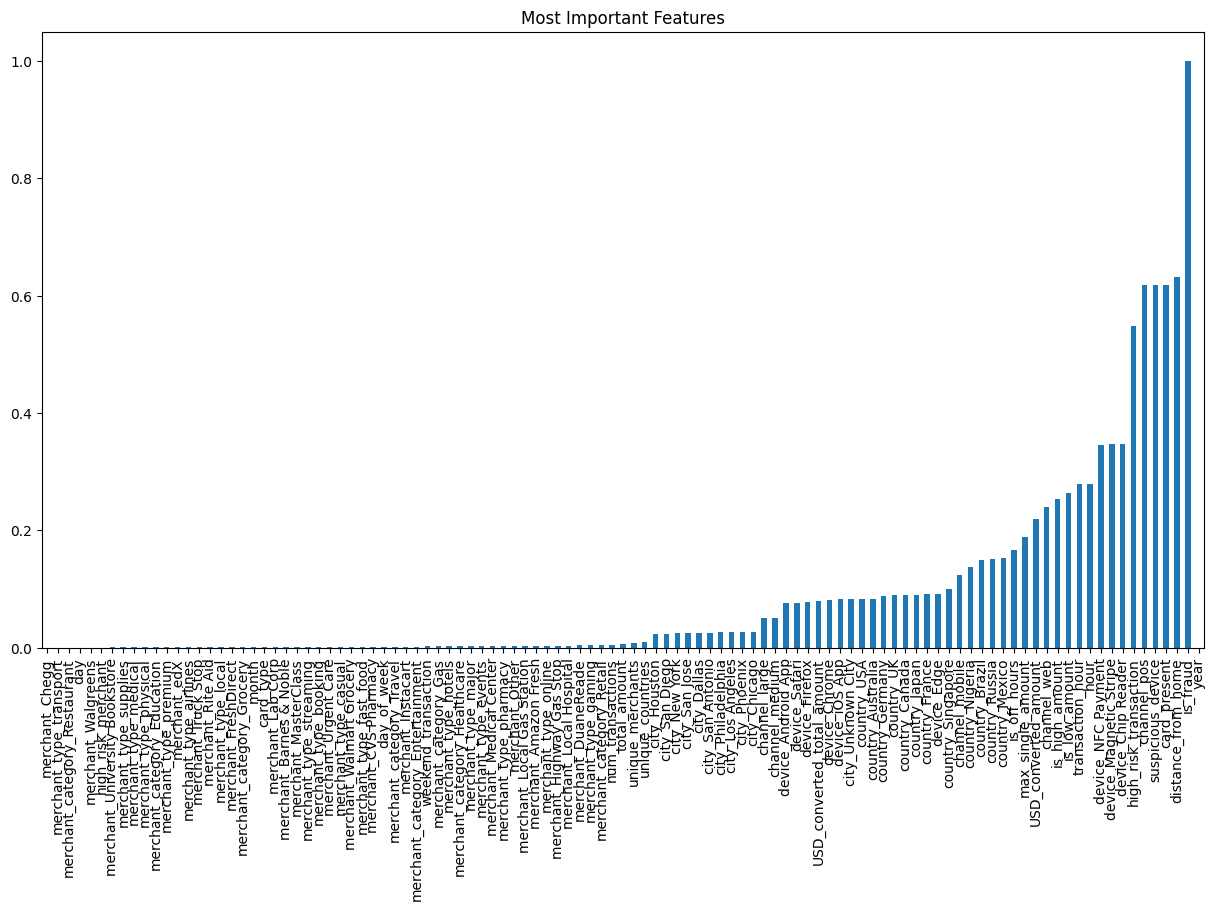

In [51]:
## Select only necessary features with its threshold greater than 0.25
plt.figure(figsize = (15, 8))
transaction_corr['is_fraud'][:-1].abs().sort_values().plot(kind = 'bar', title = 'Most Important Features')
plt.show()

In [52]:
# Select only 20 important features into list
selected_features = transaction_corr['is_fraud'][:-1].abs().sort_values().tail(40)
sel_feature_cols = selected_features.reset_index()['index']
sel_feature_cols

0                 channel_medium
1             device_Android App
2                  device_Safari
3                 device_Firefox
4     USD_converted_total_amount
5                  device_Chrome
6                 device_iOS App
7              city_Unknown City
8                    country_USA
9              country_Australia
10               country_Germany
11                    country_UK
12                country_Canada
13                 country_Japan
14                country_France
15                   device_Edge
16             country_Singapore
17                channel_mobile
18               country_Nigeria
19                country_Brazil
20                country_Russia
21                country_Mexico
22                  is_off_hours
23             max_single_amount
24          USD_converted_amount
25                   channel_web
26                is_high_amount
27                 is_low_amount
28              transaction_hour
29                          hour
30        

In [53]:
## Define X & y variable
X = transaction_cleaned[sel_feature_cols]
X.drop(columns = ['is_fraud', 'year'], axis = 1, inplace = True)
y = transaction_cleaned['is_fraud']

# Split X & y into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 97)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(200000, 38) (50000, 38) (200000,) (50000,)


/tmp/ipykernel_36/3696666106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns = ['is_fraud', 'year'], axis = 1, inplace = True)


In [54]:
X_train

,channel_medium,device_Android App,device_Safari,device_Firefox,USD_converted_total_amount,device_Chrome,device_iOS App,city_Unknown City,country_USA,country_Australia,country_Germany,country_UK,country_Canada,country_Japan,country_France,device_Edge,country_Singapore,channel_mobile,country_Nigeria,country_Brazil,country_Russia,country_Mexico,is_off_hours,max_single_amount,USD_converted_amount,channel_web,is_high_amount,is_low_amount,transaction_hour,hour,device_NFC Payment,device_Magnetic Stripe,device_Chip Reader,high_risk_transaction,channel_pos,suspicious_device,card_present,distance_from_home
119140,1,0,0,0,1.026862e+04,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.948856e+03,47.469700,0,0,1,23,23,1,0,0,1,1,1,1,1
69492,1,0,0,0,8.110416e+04,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1.482902e+03,100.531806,0,0,0,0,0,0,0,0,0,0,0,0,0
77974,1,0,0,0,8.620941e+06,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,7.309024e+05,252.744100,1,0,0,8,8,0,0,0,0,0,0,0,1
42460,1,0,0,0,7.008410e+04,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,8.846654e+03,2.580700,0,0,1,15,15,0,1,0,1,1,1,1,1
1674,1,0,1,0,3.229087e+07,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4.222040e+06,1148.965800,1,1,0,9,9,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146305,1,0,0,0,3.805109e+07,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3.625035e+06,624.265800,0,0,0,6,6,0,0,1,0,1,1,1,1
30348,1,0,0,0,9.118784e+04,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,8.980888e+03,377.878995,1,0,0,9,9,0,0,0,0,0,0,0,0
73475,1,0,0,1,2.278871e+04,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1.161114e+03,38.061384,1,0,1,12,12,0,0,0,0,0,0,0,0
113887,1,0,1,0,5.185733e+04,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1.233573e+03,76.616508,1,0,1,11,11,0,0,0,0,0,0,0,0


De seguida vamos normalizar as variáveis

* Redes Neuronais / SVM / KNN? → Usa MinMaxScaler
* Modelos lineares / PCA? → Usa StandardScaler
* Árvores / XGBoost / LightGBM? → Não escales

In [55]:
from sklearn.preprocessing import StandardScaler

X_train_StandardScaler = X_train.copy()
X_test_StandardScaler = X_test.copy()

# Inicializar o scaler
scaler = StandardScaler()

# Ajustar e transformar apenas o conjunto de treino
X_train_StandardScaler = scaler.fit_transform(X_train_StandardScaler)

# Transformar o conjunto de teste com os parâmetros aprendidos do treino
X_test_StandardScaler = scaler.transform(X_test_StandardScaler)

X_train_StandardScaler

array([[ 0.16686612, -0.41916933, -0.41804752, ...,  3.23500545,
         3.23500545,  1.45197955],
       [ 0.16686612, -0.41916933, -0.41804752, ..., -0.30911849,
        -0.30911849, -0.68871493],
       [ 0.16686612, -0.41916933, -0.41804752, ..., -0.30911849,
        -0.30911849,  1.45197955],
       ...,
       [ 0.16686612, -0.41916933, -0.41804752, ..., -0.30911849,
        -0.30911849, -0.68871493],
       [ 0.16686612, -0.41916933,  2.39207258, ..., -0.30911849,
        -0.30911849, -0.68871493],
       [ 0.16686612, -0.41916933, -0.41804752, ..., -0.30911849,
        -0.30911849,  1.45197955]])

In [56]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    print(f"Type of X_Train {X_train}")
    print(f"Type of X_Train {y_train}")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("\nClassification Report: \n",classification_report(y_test, y_pred))
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print("AUC:", roc_auc_score(y_test, y_pred))
    print(f"F1-Score: {f1_score(y_test, y_pred)}")
    print('')
    
    # ROC Curve
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    cm = confusion_matrix(y_test, y_pred, labels = model.classes_)
    disp = ConfusionMatrixDisplay(cm,display_labels= model.classes_)
    disp.plot()
    plt.show()

# Models

Esta secção é direcionada a testar diversos modelos e interpretar os resultados

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, roc_curve, auc
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

Type of X_Train         channel_medium  device_Android App  device_Safari  device_Firefox  \
119140               1                   0              0               0   
69492                1                   0              0               0   
77974                1                   0              0               0   
42460                1                   0              0               0   
1674                 1                   0              1               0   
...                ...                 ...            ...             ...   
146305               1                   0              0               0   
30348                1                   0              0               0   
73475                1                   0              0               1   
113887               1                   0              1               0   
231161               1                   0              0               0   

        USD_converted_total_amount  device_Chrome  device_i

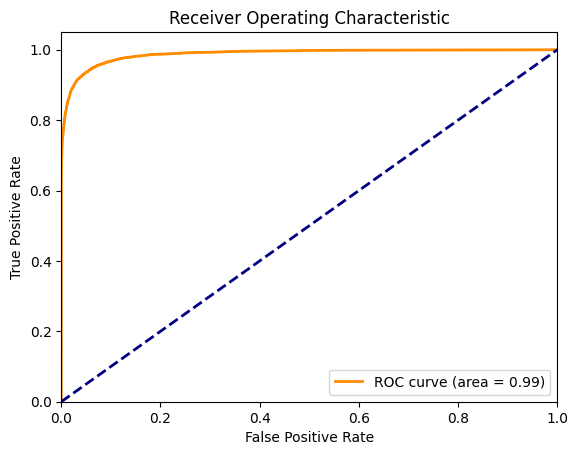

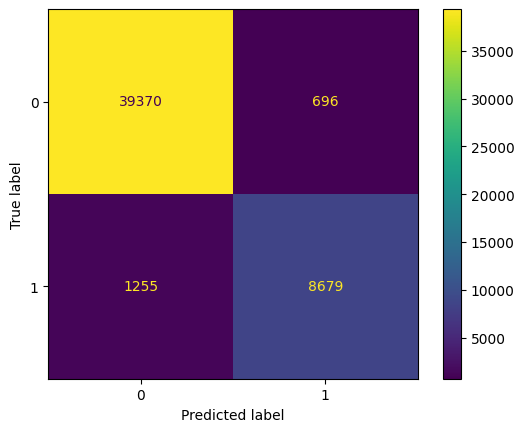

In [58]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay
from xgboost import XGBClassifier
import joblib
import matplotlib.pyplot as plt

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", XGBClassifier(
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42,
        subsample=1, 
        colsample_bytree=1, 
        min_child_weight=1
    ))
])

evaluate_model(pipe, X_train, X_test, y_train, y_test)


distance_from_home      0.568687
channel_pos             0.331296
country_Nigeria         0.021355
USD_converted_amount    0.013528
country_Japan           0.013010
transaction_hour        0.009355
country_Brazil          0.008184
max_single_amount       0.003802
country_Singapore       0.003763
country_Russia          0.003738
country_Mexico          0.003694
city_Unknown City       0.003404
country_Australia       0.001907
country_UK              0.001351
country_Germany         0.001083
dtype: float32


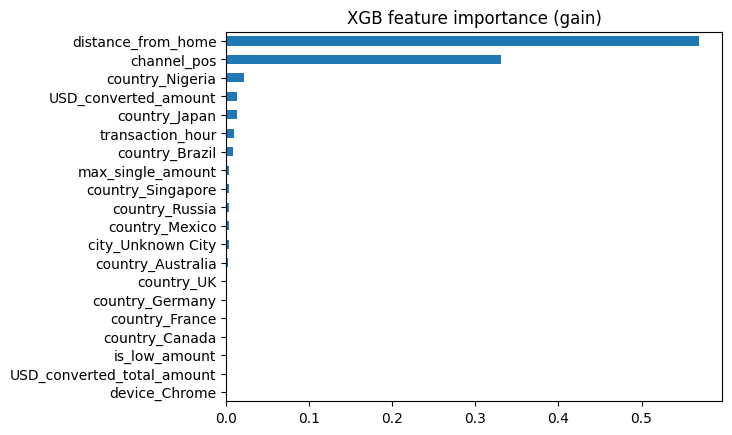

In [59]:
# lista das tuas colunas (na ordem em que treinaste)
FEATURE_COLUMNS = [
    "channel_medium","device_Android App","device_Safari","device_Firefox",
    "USD_converted_total_amount","device_Chrome","device_iOS App","city_Unknown City",
    "country_USA","country_Australia","country_Germany","country_UK","country_Canada",
    "country_Japan","country_France","device_Edge","country_Singapore","channel_mobile",
    "country_Nigeria","country_Brazil","country_Russia","country_Mexico","is_off_hours",
    "max_single_amount","USD_converted_amount","channel_web","is_high_amount","is_low_amount",
    "transaction_hour","hour","device_NFC Payment","device_Magnetic Stripe",
    "device_Chip Reader","high_risk_transaction","channel_pos","suspicious_device","card_present","distance_from_home",
]

xgb_model = pipe.named_steps["model"]
importances = pd.Series(xgb_model.feature_importances_, index=FEATURE_COLUMNS)\
               .sort_values(ascending=False)
print(importances.head(15))
importances.head(20).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("XGB feature importance (gain)")
plt.show()

distance_from_home      0.568687
channel_pos             0.331296
country_Nigeria         0.021355
USD_converted_amount    0.013528
country_Japan           0.013010
transaction_hour        0.009355
country_Brazil          0.008184
max_single_amount       0.003802
country_Singapore       0.003763
country_Russia          0.003738
country_Mexico          0.003694
city_Unknown City       0.003404
country_Australia       0.001907
country_UK              0.001351
country_Germany         0.001083
dtype: float32


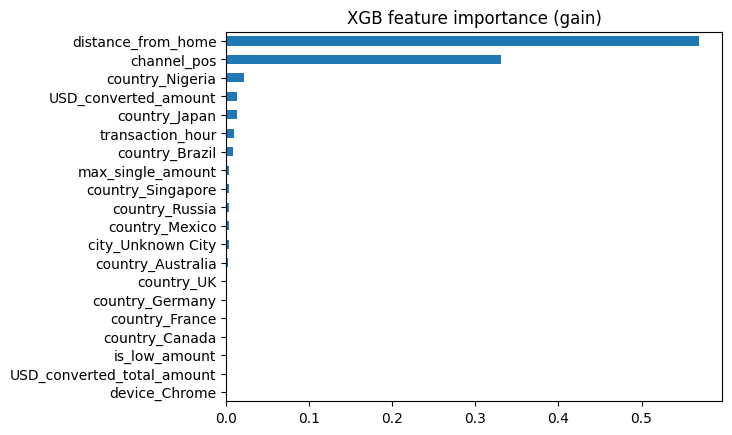

In [66]:
importances = pd.Series(xgb.feature_importances_, index=FEATURE_COLUMNS)\
               .sort_values(ascending=False)
print(importances.head(15))
importances.head(20).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("XGB feature importance (gain)")
plt.show()

In [62]:
import joblib

joblib.dump(pipe, "model_pipeline.joblib")

['model_pipeline.joblib']

In [63]:
X_train_StandardScaler

array([[ 0.16686612, -0.41916933, -0.41804752, ...,  3.23500545,
         3.23500545,  1.45197955],
       [ 0.16686612, -0.41916933, -0.41804752, ..., -0.30911849,
        -0.30911849, -0.68871493],
       [ 0.16686612, -0.41916933, -0.41804752, ..., -0.30911849,
        -0.30911849,  1.45197955],
       ...,
       [ 0.16686612, -0.41916933, -0.41804752, ..., -0.30911849,
        -0.30911849, -0.68871493],
       [ 0.16686612, -0.41916933,  2.39207258, ..., -0.30911849,
        -0.30911849, -0.68871493],
       [ 0.16686612, -0.41916933, -0.41804752, ..., -0.30911849,
        -0.30911849,  1.45197955]])

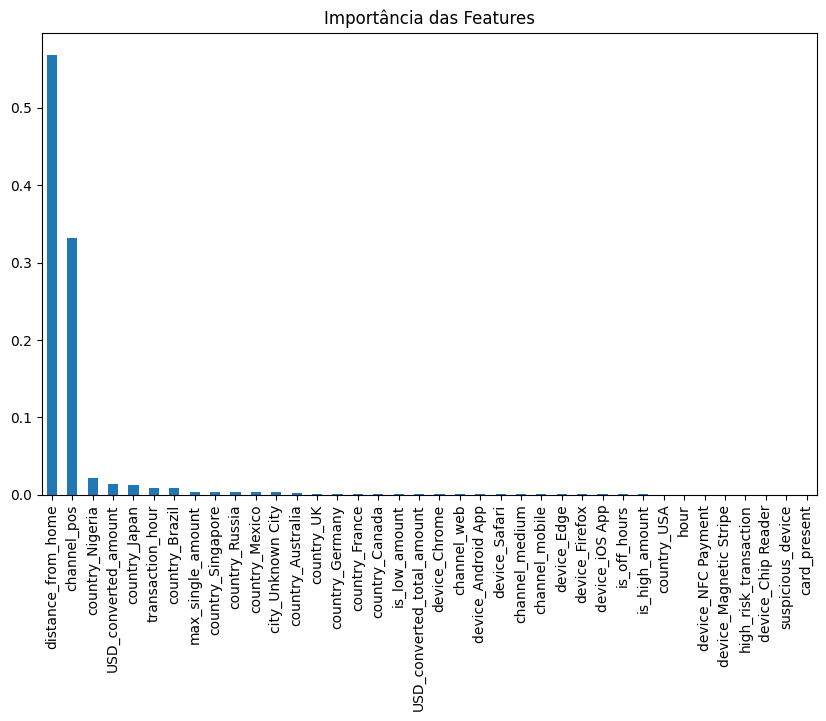

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))
importances = pd.Series(xgb_model.feature_importances_, index=FEATURE_COLUMNS)
importances.sort_values(ascending=False).plot(kind="bar")
plt.title("Importância das Features")
plt.show()

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(60, 180)
        self.relu = nn.ReLU()
        self.output = nn.Linear(180, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x